## DATA EXPLORATION

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

%matplotlib inline
sns.set(style = "darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
dfCustomer = pd.read_csv("Customer_Wrangled.csv")

In [3]:
# View the first 5 observations of the customer dataset
dfCustomer.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25             0   
1           11065           1         2950       2017-10-16             0   
2           18923          62         2950       2017-04-26             0   
3               2           3         3120       2017-05-21             1   
4            6862           4         3120       2017-10-05             0   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved  Giant Bicycles     Standard        medium       medium  ...   
2     Approved           Solex     Standard        medium       medium  ...   
3     Approved   Trek Bicycles     Standard        medium        large  ...   
4     Approved  Giant Bicycles     Standard          high       medium  ...   

   job_industry_category  wealth_segment deceased_indicator  owns_car  tenure  \
0     Financial Services   Mass Customer                  N       Yes      10   
1     Financial Services   Mass Customer                  N       Yes      10   
2     Financial Services   Mass Customer                  N       Yes      10   
3                 Health   Mass Customer                  N       Yes      10   
4                 Health   Mass Customer                  N       Yes      10   

  age            address postcode state property_valuation  
0  68  984 Hoepker Court     3064   VIC                  6  
1  68  984 Hoepker Court     3064   VIC                  6  
2  68  984 Hoepker Court     3064   VIC                  6  
3  44    4 Shopko Circle     2196   NSW                  5  
4  44    4 Shopko Circle     2196   NSW                  5  

[5 rows x 33 columns]

In [4]:
dfCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19327 non-null  int64  
 1   product_id                           19327 non-null  int64  
 2   customer_id                          19327 non-null  int64  
 3   transaction_date                     19327 non-null  object 
 4   online_order                         19327 non-null  int64  
 5   order_status                         19327 non-null  object 
 6   brand                                19327 non-null  object 
 7   product_line                         19327 non-null  object 
 8   product_class                        19327 non-null  object 
 9   product_size                         19327 non-null  object 
 10  list_price                           19327 non-null  float64
 11  standard_cost               

In [5]:
# Drop columns we won't be needing for our exploratory analysis
dfCustomer.drop(['transaction_id', 'product_id',
       'product_first_sold_date', 'transaction_year',
       'deceased_indicator'], axis = 1, inplace = True)

In [6]:
dfCustomer.columns

Index(['customer_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'profit', 'transaction_month', 'transaction_day',
       'day_of_the_week', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'address', 'postcode', 'state', 'property_valuation'],
      dtype='object')

In [7]:
# View the statistical properties of the numerical variables
dfCustomer.describe()

customer_id  online_order    list_price  standard_cost        profit  \
count  19327.000000  19327.000000  19327.000000   19327.000000  19327.000000   
mean    1740.787499      0.509701   1106.447654     555.749864    550.697790   
std     1009.743005      0.499919    582.891952     405.716005    492.995839   
min        1.000000      0.000000     12.010000       7.210000      4.800000   
25%      860.000000      0.000000    575.270000     215.140000    133.780000   
50%     1738.000000      1.000000   1163.890000     507.580000    445.210000   
75%     2615.000000      1.000000   1635.300000     795.100000    827.160000   
max     3500.000000      1.000000   2091.470000    1759.850000   1702.550000   

       transaction_day  past_3_years_bike_related_purchases        tenure  \
count     19327.000000                         19327.000000  19327.000000   
mean         15.564806                            48.937135     10.680499   
std           8.678776                            28.644584      5.672739   
min           1.000000                             0.000000      1.000000   
25%           8.000000                            24.000000      6.000000   
50%          16.000000                            48.000000     11.000000   
75%          23.000000                            73.000000     15.000000   
max          31.000000                            99.000000     22.000000   

                age      postcode  property_valuation  
count  19327.000000  19327.000000        19327.000000  
mean      45.681430   2988.643245            7.516014  
std       12.603358    852.076050            2.826879  
min       21.000000   2000.000000            1.000000  
25%       36.000000   2200.000000            6.000000  
50%       46.000000   2767.000000            8.000000  
75%       55.000000   3752.000000           10.000000  
max       92.000000   4883.000000           12.000000

In [8]:
# View the statistical properties of the non numerical variables
dfCustomer.describe(include = ["object"])

transaction_date order_status  brand product_line product_class  \
count             19327        19327  19327        19327         19327   
unique              364            2      6            4             3   
top          2017-08-18     Approved  Solex     Standard        medium   
freq                 81        19152   4171        13851         13477   

       product_size transaction_month day_of_the_week first_name last_name  \
count         19327             19327           19327      19327     19327   
unique            3                12               7       2777      3193   
top          medium           October       Wednesday  Corabelle  Pristnor   
freq          12685              1719            2824         36       638   

        gender                             job_title job_industry_category  \
count    19327                                 19327                 19327   
unique       2                                   195                     9   
top     Female  Business Systems Development Analyst         Manufacturing   
freq      9908                                  2519                  7154   

       wealth_segment owns_car           address  state  
count           19327    19327             19327  19327  
unique              3        2              3410      3  
top     Mass Customer      Yes  3 Talisman Place    NSW  
freq             9682     9698                14  10327

# UNIVARIANTE PLOTTING

### CUSTOMER ANALYSIS

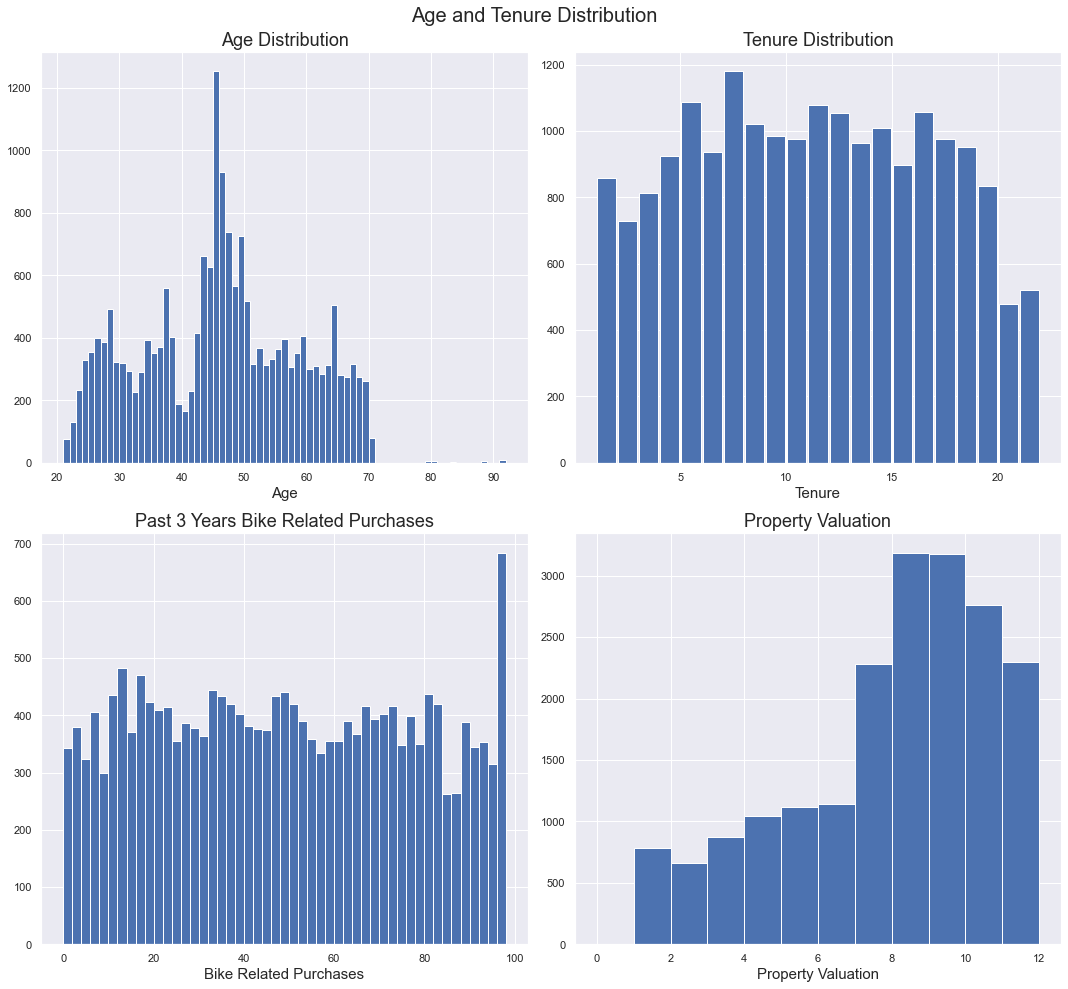

In [9]:
# Plot the distribution of age, tenure, past 3years bike related purchases and property valuation
rcParams["figure.figsize"] = 15, 14
plt.suptitle("Age and Tenure Distribution", fontsize = 20)
# Create a 2x2 subplot grid
# First subplot
plt.subplot(2, 2, 1)
bins = np.arange(21, dfCustomer["age"].max()+1, 1)
plt.hist(data = dfCustomer, x = "age", bins = bins)
plt.title("Age Distribution", fontsize = 18)
plt.xlabel("Age", fontsize = 15)

# Second subplot
plt.subplot(2,2, 2)
bins = np.arange(1, dfCustomer["tenure"].max()+1, 1)
plt.hist(data = dfCustomer, x = "tenure", bins = bins, rwidth = 0.9)
plt.title("Tenure Distribution", fontsize = 18)
plt.xlabel("Tenure", fontsize = 15)

# Third subplot
plt.subplot(2, 2, 3)
bins = np.arange(0, dfCustomer["past_3_years_bike_related_purchases"].max()+1, 2)
plt.hist(data = dfCustomer, x = "past_3_years_bike_related_purchases", bins = bins)
plt.title("Past 3 Years Bike Related Purchases", fontsize = 18)
plt.xlabel("Bike Related Purchases", fontsize = 15)

# Fourth subplot
plt.subplot(2, 2, 4)
bins = np.arange(0, dfCustomer["property_valuation"].max()+0.5, 1)
plt.hist(data = dfCustomer, x = "property_valuation", bins = bins)
plt.title("Property Valuation", fontsize = 18)
plt.xlabel("Property Valuation", fontsize = 15)
plt.tight_layout()
plt.show()

The age distribution highlights a substantial concentration of customers approximately at the age of 45, which represents the peak demographic.

The tenure distribution exhibits a unimodal pattern, indicating a rise in customer transactions with increasing tenure. However, there is a noticeable decline in customers' activity at the 18th tenure mark.

The distribution of purchases related to bikes indicates that customers that have purchased around 98 bike related purchases have the highest frequency of transactions in this distribution.

Property valuation demonstrates a left-skewed distribution pattern, with the most prominent peak occurring in the range of 8 to 10.

In [10]:
# Bin the age and tenure feature into a categorical feature "age_bin" with 
# categorical labels for easy grouping
age_bin = [20, 30, 40, 50, 60, 70, 80, 90, 100]
text = ["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s"]
dfCustomer["age_bin"] = pd.cut(dfCustomer["age"], age_bin, labels = text)
tenure_bin = [1, 5, 9, 13, 17, 22]
text = ["1-5", "5-9", "9-13", "13-17", "17-22"]
dfCustomer["tenure_bin"] = pd.cut(dfCustomer["tenure"], tenure_bin, labels = text)

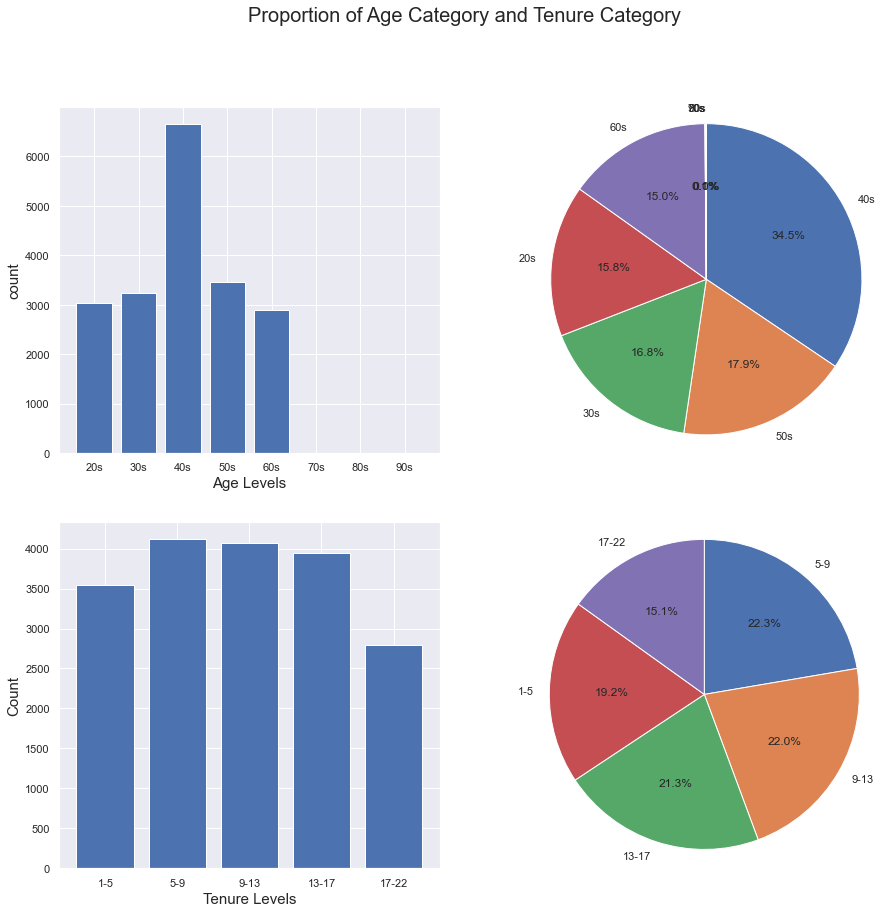

In [11]:
# Plot the binned categorical distribution of age and tenure
count = dfCustomer.groupby("age_bin").count()["brand"]
total = dfCustomer.shape[0]
prop = count/total
plt.suptitle("Proportion of Age Category and Tenure Category", fontsize = 20)

# Create a 2x2 subplot grid
# First subplot
plt.subplot(2, 2, 1)
position = np.arange(8)
plt.bar(position, count)
plt.xlabel("Age Levels", fontsize = 15)
plt.ylabel("count", fontsize = 15)
label = count.index.values
plt.xticks(position, label)

# Second subplot
plt.subplot(2, 2, 2)
count = count.sort_values(ascending = False)
label = count.index
plt.pie(count, labels = label, startangle = 90, counterclock = False, autopct = "%1.1f%%")
plt.axis("square")

# Third subplot
plt.subplot(2, 2, 3)
count = dfCustomer.groupby("tenure_bin").count()["brand"]
prop = count/total
position = np.arange(5)
plt.bar(position, count)
plt.xlabel("Tenure Levels", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
label = count.index.values
plt.xticks(position, label)

# Fourth subplot
plt.subplot(2, 2, 4)
count = count.sort_values(ascending = False)
label = count.index
plt.pie(count, labels = label, startangle = 90, counterclock = False, autopct = "%1.1f%%")
plt.axis("square")
plt.show()

Additionally, this categorical plot for age underscores that individuals in their 40s constitute 34.5% of the overall transactions, followed by those in their 50s and 30s, making up 17.7% and 16.8%, respectively.

The categorical distribution of customer tenure exhibits a clear unimodal pattern, with its primary peaks occurring in the 5-9 and 9-13 ranges, representing proportions of 22.3% and 22.0%, respectively.

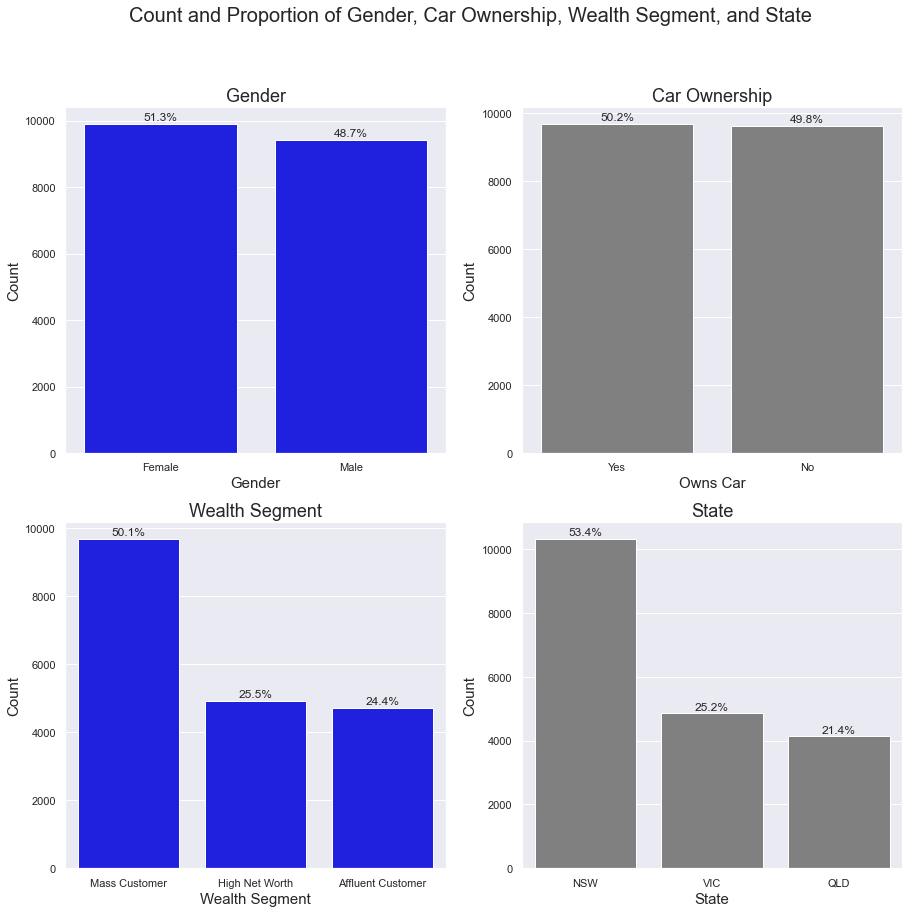

In [12]:
# Plot the categorical distribution of gender, car ownership, wealth segment, and state
plt.suptitle("Count and Proportion of Gender, Car Ownership, Wealth Segment, and State", fontsize = 20)

# Create a 2x2 subplot grid
# First subplot
plt.subplot(2, 2, 1)
count = dfCustomer.gender.value_counts()
sns.countplot(data = dfCustomer, x = "gender", color = "blue", order = count.index)
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.1f}%".format(100*counts/total)
    vert_pos = counts + 100
    plt.text(loc, vert_pos, pct_str, ha = "center")
plt.title("Gender", fontsize = 18)
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# Second subplot
plt.subplot(2, 2, 2)
count = dfCustomer.owns_car.value_counts()
sns.countplot(data = dfCustomer, x = "owns_car", color = "grey", order = count.index)
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.1f}%".format(100*counts/total)
    plt.text(loc, counts + 100, pct_str, ha = "center")
plt.title("Car Ownership", fontsize = 18)
plt.xlabel("Owns Car", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# Third subplot
plt.subplot(2, 2, 3)
count = dfCustomer.wealth_segment.value_counts()
sns.countplot(data = dfCustomer, x = "wealth_segment", color = "blue", order = count.index)
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.1f}%".format(100*counts/total)
    vert_pos = counts + 100
    plt.text(loc, vert_pos, pct_str, ha = "center")
plt.title("Wealth Segment", fontsize = 18)
plt.xlabel("Wealth Segment", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# Fourth subplot
plt.subplot(2, 2, 4)
count = dfCustomer.state.value_counts()
sns.countplot(data = dfCustomer, x = "state", color = "grey", order = count.index)
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.1f}%".format(100*counts/total)
    plt.text(loc, counts + 100, pct_str, ha = "center")
plt.title("State", fontsize = 18)
plt.xlabel("State", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

The bar chart depicting gender distribution reveals that female customers outnumber their male counterparts, accounting for 51.3% and 48.7%, respectively.

In the bar chart illustrating car ownership, customers with cars are slightly more prevalent than those without, representing 50.2% and 49.8%, respectively.

Examining the bar chart for wealth segments, it becomes evident that mass customers significantly outnumber high net worth and affluent customers, comprising 50.1%, 25.5%, and 24.4% of the total, respectively.

Lastly, the bar chart depicting state distribution indicates that customers hailing from New South Wales greatly outnumber those from Victoria and Queensland, constituting 53.4%, 25.2%, and 21.4%, respectively.

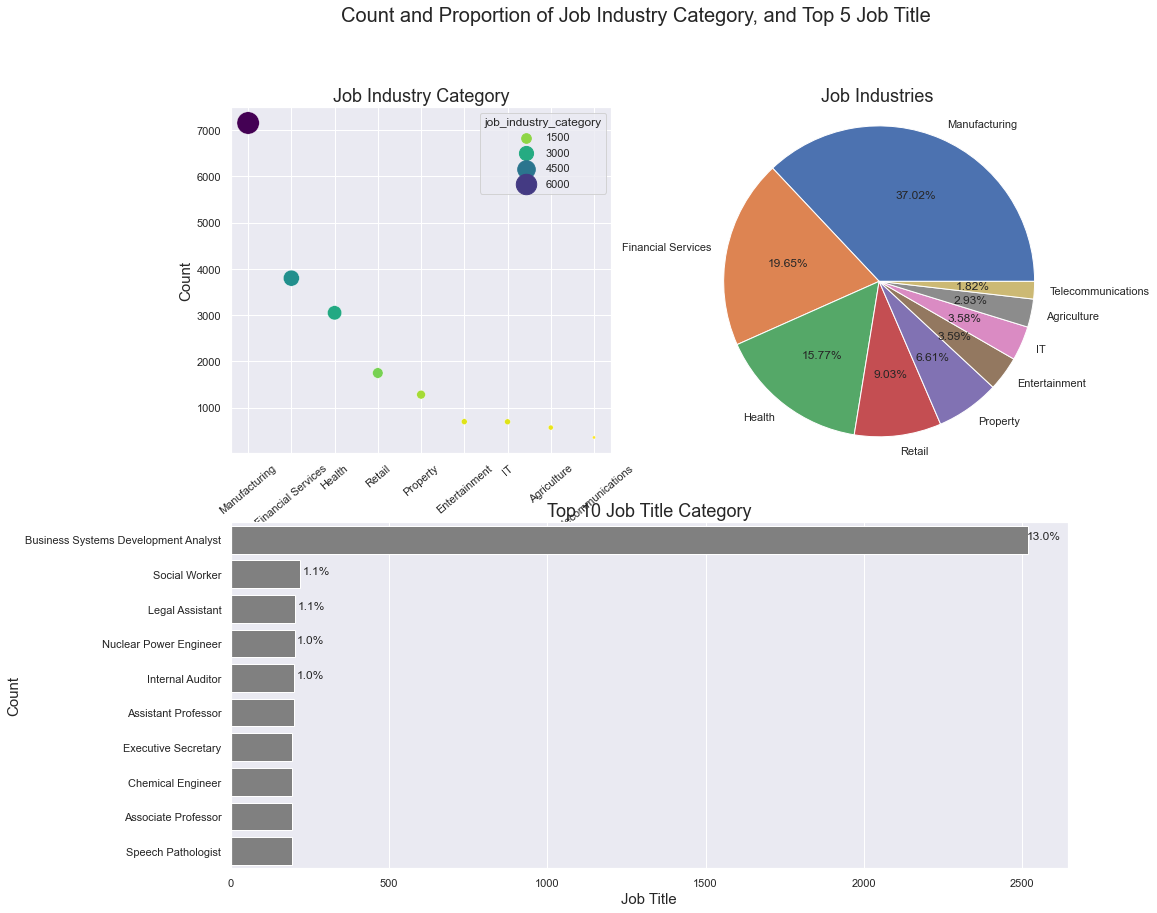

In [13]:
# Plot the categorical distribution of job industry category, and top 10 job title category
jobcat = dfCustomer["job_industry_category"].value_counts().to_frame()
jobtitle10 = dfCustomer["job_title"].value_counts().head(10)
plt.suptitle("Count and Proportion of Job Industry Category, and Top 5 Job Title", fontsize = 20)

# Create a 2x2 subplot grid
# First subplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = jobcat.index, y = "job_industry_category", data = jobcat, size = "job_industry_category", sizes = (10, 500), hue = "job_industry_category", palette = "viridis_r")
plt.title("Job Industry Category", fontsize = 18)
plt.xticks(rotation = 40)
plt.xlabel("Job Industry", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# Second subplot
plt.subplot(2, 2, 2)
dfCustomer["job_industry_category"].value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Job Industries', fontsize = 18)
plt.ylabel('')
plt.axis("square")

# Third subplot
plt.subplot(2, 1, 2)
sns.countplot(data = dfCustomer, y = "job_title", color = "grey", order = jobtitle10.index)
for i in range(5):
    counts = jobtitle10[i]
    pct_str = "{:.1f}%".format(100*counts/total)
    vert_pos = counts + 50
    plt.text(vert_pos, i, pct_str, ha = "center")
plt.title("Top 10 Job Title Category", fontsize = 18)
plt.xlabel("Job Title", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

Among the job industry categories, Manufacturing, Financial Services, Health, Retail, and Property emerge as the top 5 leading sectors, with Manufacturing commanding a substantial share of 37% within the job industry category while Telecommunication sector has the the least transaction purchase with a 1.8% of the entire category

Within the top 10 job title categories, Business Systems Development Analyst stands out as the dominant role, accounting for 13% of the entire job title category.

### SALES ANALYSIS

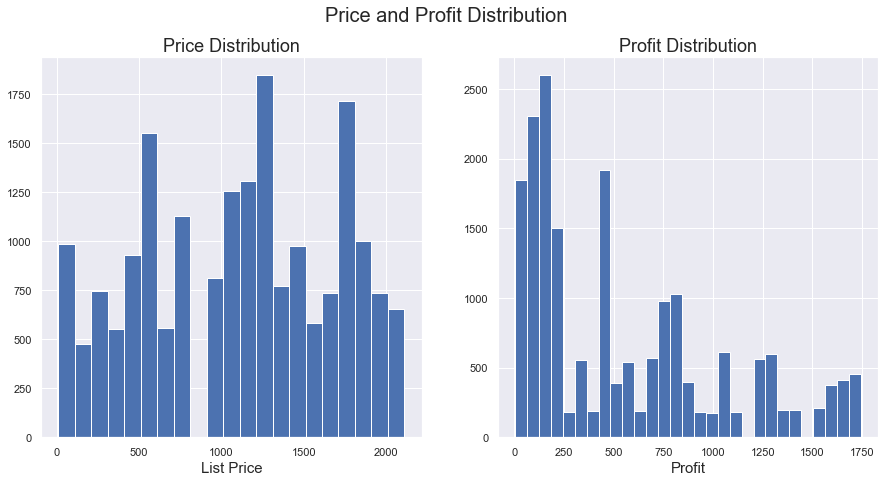

In [14]:
# Plot the distribution of list price and profit 
rcParams["figure.figsize"] = 15, 7
plt.suptitle("Price and Profit Distribution", fontsize = 20)

# Create a 1x2 subplot grid
# First subplot
plt.subplot(1, 2, 1)
bins = np.arange(12, dfCustomer["list_price"].max()+100, 100)
plt.hist(data = dfCustomer, x = "list_price", bins = bins)
plt.title("Price Distribution", fontsize = 18)
plt.xlabel("List Price", fontsize = 15)

# Second subplot
plt.subplot(1,2, 2)
bins = np.arange(4, dfCustomer["profit"].max()+60, 60)
plt.hist(data = dfCustomer, x = "profit", bins = bins)
plt.title("Profit Distribution", fontsize = 18)
plt.xlabel("Profit", fontsize = 15)
plt.show()

The histogram plot representing list prices reveals a distribution with multiple modes. A significant number of items are clustered around the 500 mark, and there's a noticeable drop in the number of items as prices approach 800. A striking increase in item frequency occurs at around 1300, marking the highest point. Another notable peak appears around 1700, indicating another group of items in this price range. These multiple peaks in the price distribution can be attributed to various factors, such as distinct customer segments or product variations.

Similarly, the profit distribution also exhibits a multi-modal pattern, with the highest peak occurring at around 125. Like the list price distribution, this multi-modal pattern can also be attributed to factors like different customer segments or product differentiation.

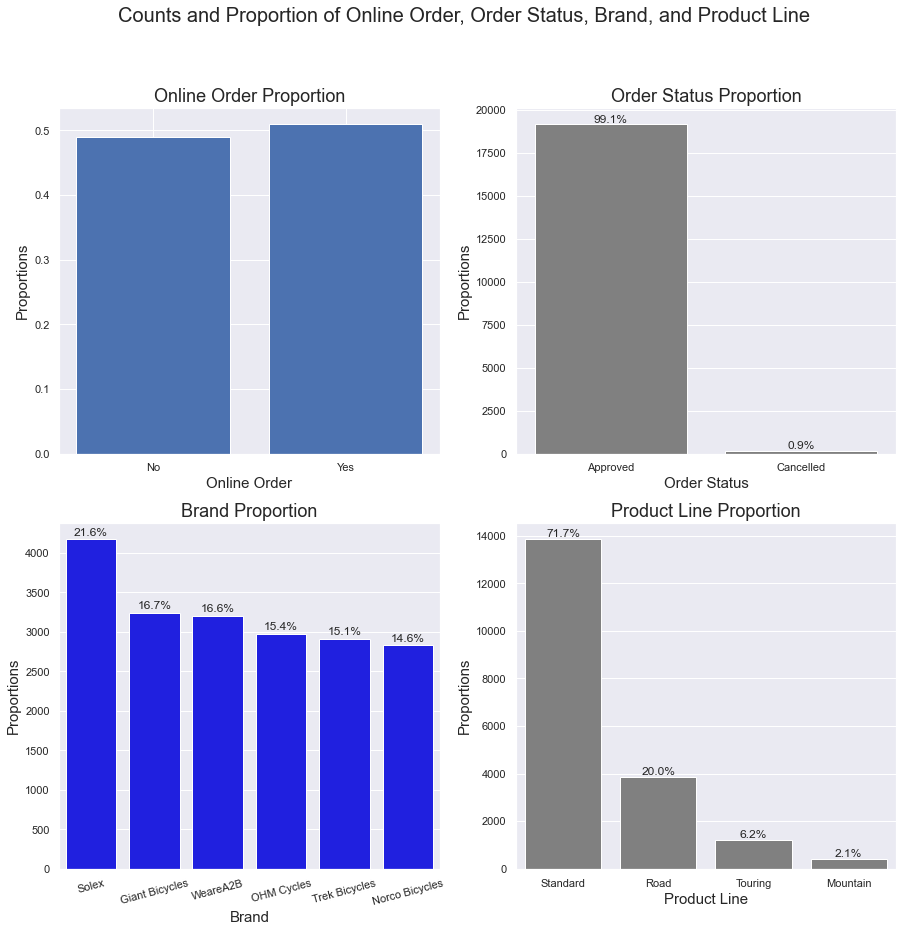

In [15]:
# Plot the categorical distribution of Online Order, Order Status, Brand, and Product Line
rcParams["figure.figsize"] = 15, 14
count = dfCustomer.groupby("online_order").count()["brand"]
total = dfCustomer.shape[0]
prop = count/total
plt.suptitle("Counts and Proportion of Online Order, Order Status, Brand, and Product Line", fontsize = 20)

# Create a 2x2 subplot grid
# First subplot
plt.subplot(2, 2, 1)
position = [1, 2]
plt.bar(position, prop)
plt.title("Online Order Proportion", fontsize = 18)
plt.xlabel("Online Order", fontsize = 15)
plt.ylabel("Proportions", fontsize = 15)
label = ["No", "Yes"]
plt.xticks(position, label)

# Second subplot
plt.subplot(2, 2, 2)
count = dfCustomer.order_status.value_counts()
sns.countplot(data = dfCustomer, x = "order_status", color = "grey")
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.1f}%".format(100*counts/total)
    plt.text(loc, counts + 100, pct_str, ha = "center")
plt.title("Order Status Proportion", fontsize = 18)
plt.xlabel("Order Status", fontsize = 15)
plt.ylabel("Proportions", fontsize = 15)

# Third subplot
plt.subplot(2, 2, 3)
count = dfCustomer.brand.value_counts()
sns.countplot(data = dfCustomer, x = "brand", color = "blue", order = count.index)
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.1f}%".format(100*counts/total)
    vert_pos = counts + 50
    plt.text(loc, vert_pos, pct_str, ha = "center")
plt.xticks(rotation = 15)
plt.title("Brand Proportion", fontsize = 18)
plt.xlabel("Brand", fontsize = 15)
plt.ylabel("Proportions", fontsize = 15)

# Fourth subplot
plt.subplot(2, 2, 4)
count = dfCustomer.product_line.value_counts()
sns.countplot(data = dfCustomer, x = "product_line", color = "grey", order = count.index)
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.1f}%".format(100*counts/total)
    plt.text(loc, counts + 100, pct_str, ha = "center")
plt.title("Product Line Proportion", fontsize = 18)
plt.xlabel("Product Line", fontsize = 15)
plt.ylabel("Proportions", fontsize = 15)
plt.show()

The analysis of online and offline orders reveals that online purchases account for a majority share, comprising 50.9% of all customer transactions, while offline purchases represent 49%.

A closer examination of the bar chart depicting order statuses reveals that a remarkable 99.1% of transactions were successfully completed, with the orders being approved. Conversely, the percentage of orders that were cancelled is less than 1%, signifying a high level of transaction success.

Turning our attention to brand preferences, the bar chart illustrates that the "Solex" brand emerges as the clear favorite among customers, commanding a significant proportion of 21.6%.

In terms of product line preferences, the bar chart showcases that the "Standard" product line is the preferred choice for the majority of customers, capturing a substantial market share of 71.7%.

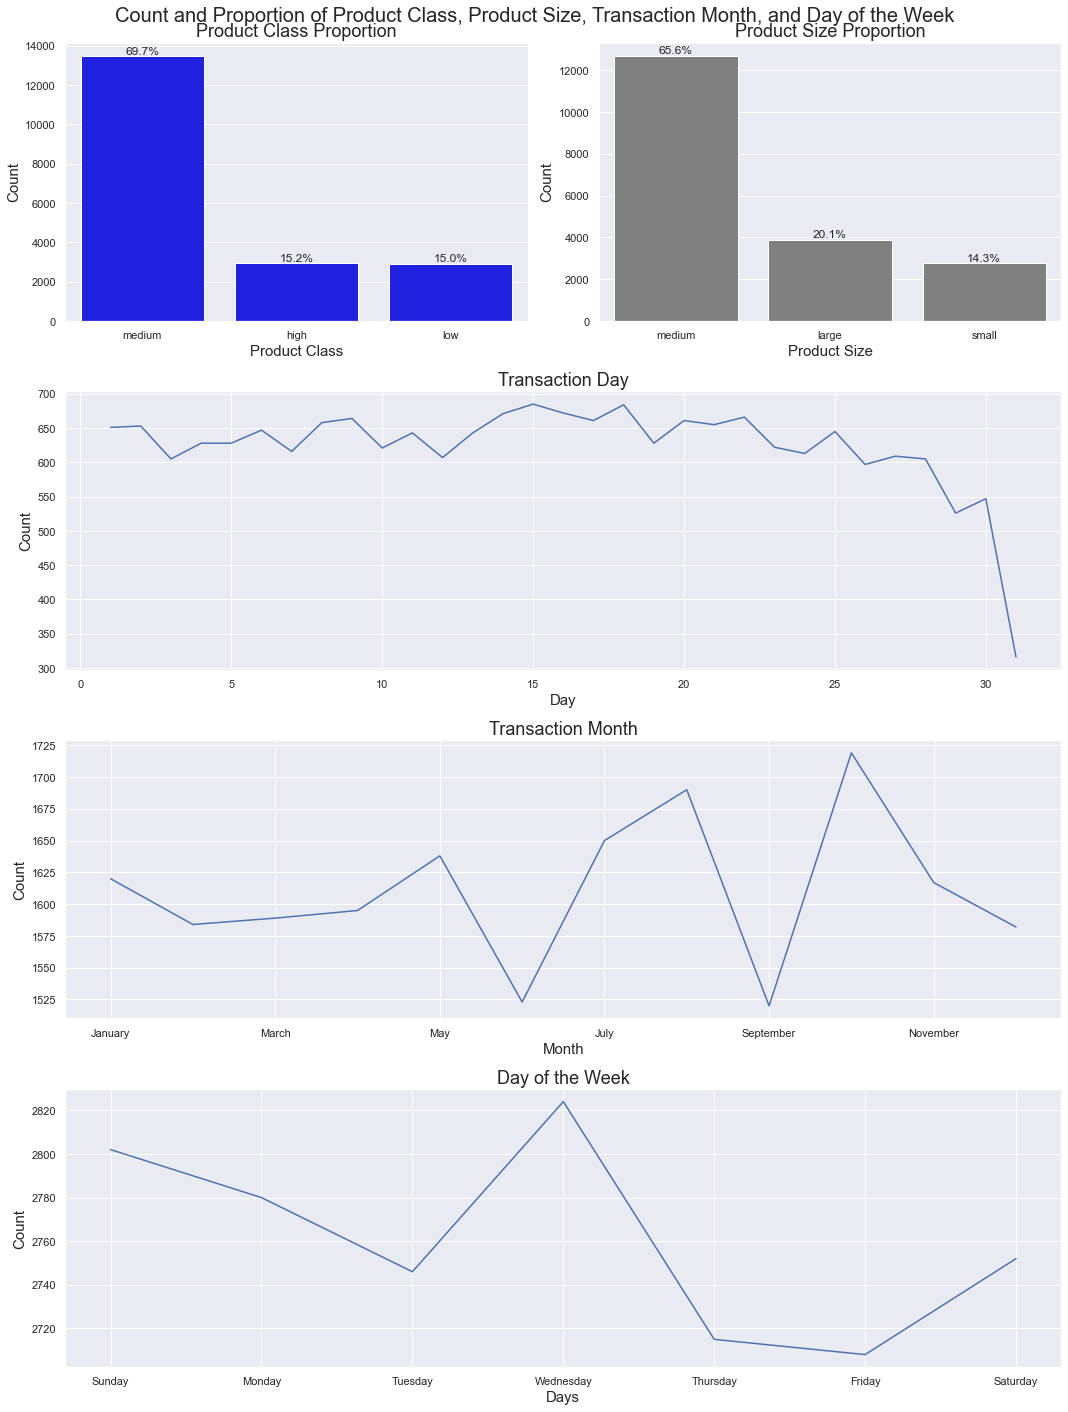

In [16]:
# Plot the categorical distribution of Product Class, Product Size, Transaction Month, and Day of the Week
rcParams["figure.figsize"] = 15, 20
plt.suptitle("Count and Proportion of Product Class, Product Size, Transaction Month, and Day of the Week", fontsize = 20)

# Create a 4x2 subplot grid
# First subplot
plt.subplot(4, 2, 1)
count = dfCustomer.product_class.value_counts()
sns.countplot(data = dfCustomer, x = "product_class", color = "blue", order = count.index)
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.1f}%".format(100*counts/total)
    vert_pos = counts + 100
    plt.text(loc, vert_pos, pct_str, ha = "center")
plt.title("Product Class Proportion", fontsize = 18)
plt.xlabel("Product Class", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# Second subplot
plt.subplot(4, 2, 2)
count = dfCustomer.product_size.value_counts()
sns.countplot(data = dfCustomer, x = "product_size", color = "grey", order = count.index)
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.1f}%".format(100*counts/total)
    plt.text(loc, counts + 100, pct_str, ha = "center")
plt.title("Product Size Proportion", fontsize = 18)
plt.xlabel("Product Size", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# Third subplot
plt.subplot(4, 1, 2)
day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
class_day = pd.api.types.CategoricalDtype(ordered = True, categories = day)
dfCustomer["day_of_the_week"] = dfCustomer["day_of_the_week"].astype(class_day)
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
class_month = pd.api.types.CategoricalDtype(ordered = True, categories = month)
dfCustomer["transaction_month"] = dfCustomer["transaction_month"].astype(class_month)

dfCustomer.transaction_day.value_counts().sort_index().plot(kind = "line")
plt.title("Transaction Day", fontsize = 18)
plt.xlabel("Day", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# Plot a line graph for transaction month and day of the week
# Fourth subplot
plt.subplot(4, 1, 3)
dfCustomer.transaction_month.value_counts().sort_index().plot(kind = "line")
plt.title("Transaction Month", fontsize = 18)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

# Fifth subplot
plt.subplot(4, 1, 4)
dfCustomer.day_of_the_week.value_counts().sort_index().plot(kind = "line")
plt.title("Day of the Week", fontsize = 18)
plt.xlabel("Days", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.tight_layout()
plt.show()

In our analysis of product classes, it's evident that the medium-class products dominate in terms of sales, accounting for approximately 69.7% of the total.

Furthermore, when we consider product sizes, medium-sized products emerge as the clear leaders in sales, constituting a significant 65.6%. Large-sized products follow with 20.1%, while small-sized products have the smallest share at 14.3%.

Our examination of the day-of-the-month graph reveals a subtle uptick in sales around the middle of the month, contrasted by a noticeable drop in sales towards the end of the month.

The month-wise analysis points to October as the peak sales month, closely trailed by August in the second position, and May for a third position.

Interestingly, it appears that Wednesdays stand out as a successful day for achieving high sales levels.

In [17]:
# Subset sucesssful transactions from the entire dataset
df_Approved = dfCustomer[dfCustomer["order_status"] == "Approved"]
df_Approved

customer_id transaction_date  online_order order_status  \
0             2950       2017-02-25             0     Approved   
1             2950       2017-10-16             0     Approved   
2             2950       2017-04-26             0     Approved   
3             3120       2017-05-21             1     Approved   
4             3120       2017-10-05             0     Approved   
...            ...              ...           ...          ...   
19322         3168       2017-02-21             1     Approved   
19323         3168       2017-04-11             0     Approved   
19324         3168       2017-06-03             0     Approved   
19325         3168       2017-09-30             0     Approved   
19326         3464       2017-12-13             1     Approved   

                brand product_line product_class product_size  list_price  \
0               Solex     Standard        medium       medium       71.49   
1      Giant Bicycles     Standard        medium       medium     1403.50   
2               Solex     Standard        medium       medium      478.16   
3       Trek Bicycles     Standard        medium        large     2091.47   
4      Giant Bicycles     Standard          high       medium     1129.13   
...               ...          ...           ...          ...         ...   
19322           Solex     Standard        medium       medium      441.49   
19323           Solex      Touring        medium        large     2083.94   
19324   Trek Bicycles     Standard        medium        large     2091.47   
19325   Trek Bicycles     Standard        medium        large     2091.47   
19326           Solex     Standard          high       medium      748.17   

       standard_cost  ...     wealth_segment owns_car  tenure age  \
0              53.62  ...      Mass Customer      Yes      10  68   
1             954.82  ...      Mass Customer      Yes      10  68   
2             298.72  ...      Mass Customer      Yes      10  68   
3             388.92  ...      Mass Customer      Yes      10  44   
4             677.48  ...      Mass Customer      Yes      10  44   
...              ...  ...                ...      ...     ...  ..   
19322          84.99  ...  Affluent Customer       No      22  47   
19323         675.03  ...  Affluent Customer       No      22  47   
19324         388.92  ...  Affluent Customer       No      22  47   
19325         388.92  ...  Affluent Customer       No      22  47   
19326         448.90  ...      Mass Customer      Yes       4  41   

                    address postcode state  property_valuation age_bin  \
0         984 Hoepker Court     3064   VIC                   6     60s   
1         984 Hoepker Court     3064   VIC                   6     60s   
2         984 Hoepker Court     3064   VIC                   6     60s   
3           4 Shopko Circle     2196   NSW                   5     40s   
4           4 Shopko Circle     2196   NSW                   5     40s   
...                     ...      ...   ...                 ...     ...   
19322  88 Rutledge Crossing     4215   QLD                   7     40s   
19323  88 Rutledge Crossing     4215   QLD                   7     40s   
19324  88 Rutledge Crossing     4215   QLD                   7     40s   
19325  88 Rutledge Crossing     4215   QLD                   7     40s   
19326       7 Jackson Court     2076   NSW                  10     40s   

      tenure_bin  
0           9-13  
1           9-13  
2           9-13  
3           9-13  
4           9-13  
...          ...  
19322      17-22  
19323      17-22  
19324      17-22  
19325      17-22  
19326        1-5  

[19152 rows x 30 columns]

# BIVARIANTE PLOTTING

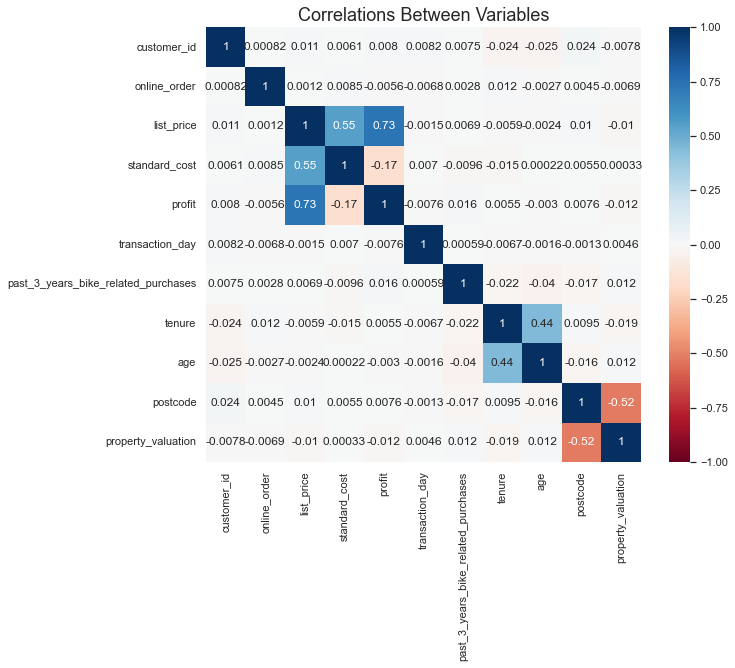

In [18]:
# Plot a correlation table
plt.figure(figsize = (10, 8))
sns.heatmap(df_Approved.corr(), annot = True, square = True, cmap = "RdBu", vmax = 1, vmin = -1)
plt.title("Correlations Between Variables", size = 18);

In [19]:
from scipy import stats
# lets calculate the Pearson correlation coefficient for correlated variables
Pearson_coef, P_value = stats.pearsonr(df_Approved["list_price"], df_Approved["profit"])
# Set the significance level
alpha = 0.05
# Calculate the degree of freedom
n = len(df_Approved)
degree_of_freedom = n - 2
# Calculate the critical value (two-tailed test)
critical_value = stats.t.ppf(1 - alpha/2, degree_of_freedom)
# Calculate the t-stats
t_stats = (Pearson_coef * np.sqrt(n-2)) / np.sqrt(1 - Pearson_coef**2)

# Print the results
print(f"Correlation Coefficient: {Pearson_coef: .4f}")
print(f"t-statistic: {t_stats: .4f}")
print(f"P-value: {P_value: .4f}")

# Check the significance
if P_value <= alpha:
    print("The correlation between profit and list price is statistically significant.")
else:
    print("The correlation between profit and list price is not statistically significant.")

Correlation Coefficient:  0.7278
t-statistic:  146.8705
P-value:  0.0000
The correlation between profit and list price is statistically significant.


In [20]:
# lets calculate the Pearson correlation coefficient for correlated variables
Pearson_coef, P_value = stats.pearsonr(df_Approved["age"], df_Approved["tenure"])
# Set the significance level
alpha = 0.05
# Calculate the degree of freedom
n = len(df_Approved)
degree_of_freedom = n - 2
# Calculate the critical value (two-tailed test)
critical_value = stats.t.ppf(1 - alpha/2, degree_of_freedom)
# Calculate the t-stats
t_stats = (Pearson_coef * np.sqrt(n-2)) / np.sqrt(1 - Pearson_coef**2)

# Print the results
print(f"Correlation Coefficient: {Pearson_coef: .4f}")
print(f"t-statistic: {t_stats: .4f}")
print(f"P-value: {P_value: .4f}")

# Check the significance
if P_value <= alpha:
    print("The correlation between age and tenure is statistically significant.")
else:
    print("The correlation between age and tenure is not statistically significant.")

Correlation Coefficient:  0.4425
t-statistic:  68.2899
P-value:  0.0000
The correlation between age and tenure is statistically significant.


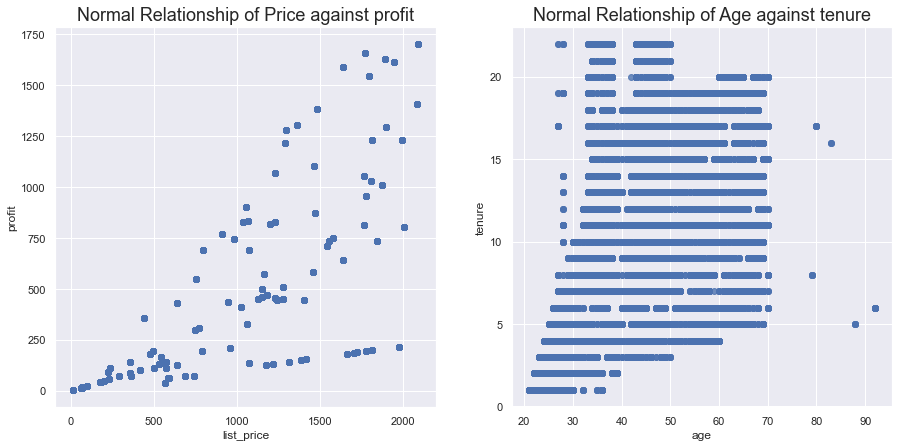

In [21]:
# Plot a scatter plot of list price against profit
plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
sns.regplot(data = df_Approved, x = "list_price", y = "profit", fit_reg = False)
plt.title("Normal Relationship of Price against profit", fontsize = 18)

plt.subplot(1, 2, 2)
sns.regplot(data = df_Approved, x = "age", y = "tenure", fit_reg = False)
plt.title("Normal Relationship of Age against tenure", fontsize = 18)
plt.show()

The observed positive correlation between profit and list price means that as the product price increases, the profit tends to increase as well. In other words, there is a tendency for higher profits in our dataset. This may be because customers are willing to pay more for certain products.

The observed positive correlation between age and tenure suggests that as customer's age increases, their tenure tends to increase as well.

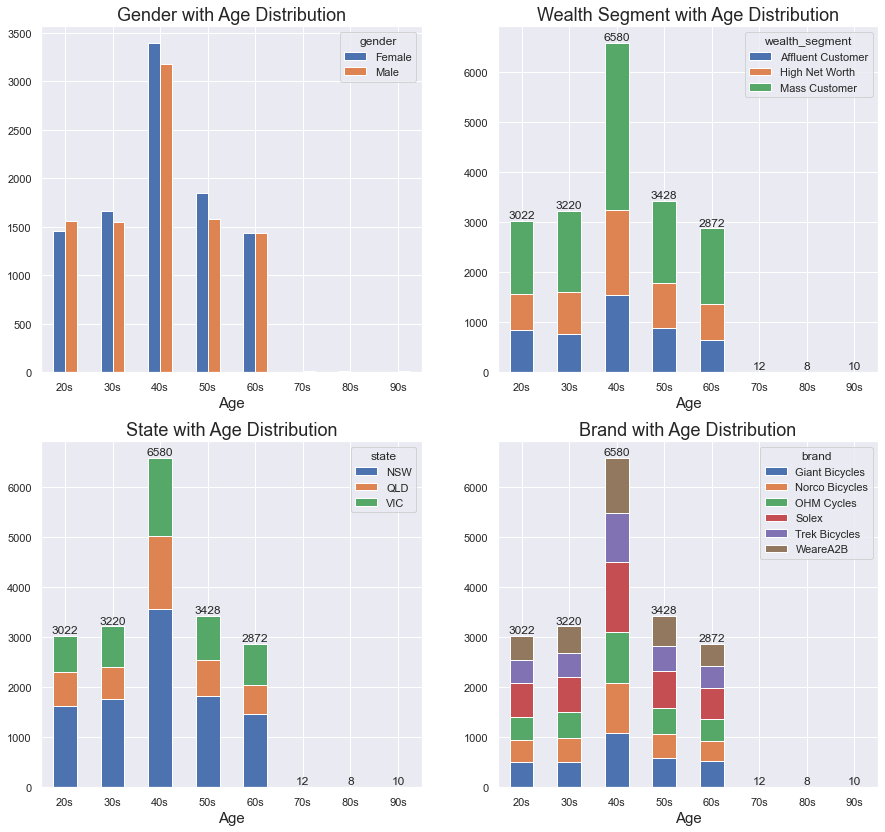

In [22]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 14))

# First subplot
count = df_Approved.age_bin.value_counts().sort_index()
age_gender = df_Approved.groupby(['age_bin', 'gender'])['gender'].count().unstack()
age_gender.plot.bar(ax=axes[0, 0])
custom_labels = count.index
axes[0, 0].set_xticks(range(len(custom_labels)))
axes[0, 0].set_title('Gender with Age Distribution', fontsize=18)
axes[0, 0].set_xticklabels(custom_labels, rotation=360)
axes[0, 0].set_xlabel("Age", fontsize=15)

# Second subplot
age_wealth = df_Approved.groupby(['age_bin', 'wealth_segment'])['wealth_segment'].count().unstack()
age_wealth.plot(kind = "bar", stacked=True, ax=axes[0, 1])
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.0f}".format(counts)
    axes[0, 1].text(loc, counts + 50, pct_str, ha="center")
custom_labels = count.index
axes[0, 1].set_xticks(range(len(custom_labels)))
axes[0, 1].set_title('Wealth Segment with Age Distribution', fontsize=18)
axes[0, 1].set_xticklabels(custom_labels, rotation=360)
axes[0, 1].set_xlabel("Age", fontsize=15)

# Third subplot
age_state = df_Approved.groupby(['age_bin', 'state'])['state'].count().unstack()
age_state.plot.bar(stacked=True, ax=axes[1, 0])
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.0f}".format(counts)
    axes[1, 0].text(loc, counts + 50, pct_str, ha="center")
custom_labels = count.index
axes[1, 0].set_xticks(range(len(custom_labels)))
axes[1, 0].set_title('State with Age Distribution', fontsize=18)
axes[1, 0].set_xticklabels(custom_labels, rotation=360)
axes[1, 0].set_xlabel("Age", fontsize=15)

# Fourth subplot
age_brand = df_Approved.groupby(['age_bin', 'brand'])['brand'].count().unstack()
age_brand.plot.bar(stacked=True, ax=axes[1, 1])
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.0f}".format(counts)
    axes[1, 1].text(loc, counts + 50, pct_str, ha="center")
custom_labels = count.index
axes[1, 1].set_xticks(range(len(custom_labels)))
axes[1, 1].set_title('Brand with Age Distribution', fontsize=18)
axes[1, 1].set_xticklabels(custom_labels, rotation=360)
axes[1, 1].set_xlabel("Age", fontsize=15)

plt.show()

The breakdown of age by gender reveals an interesting trend. Female customers outnumber male customers in all age categories, except for individuals in their 20s, where male customers take the lead. This observation provides additional support for our initial finding that females have a higher proportion of transactions compared to males.

Furthermore, our initial findings regarding wealth segments is reinforced by the data. Mass customers exhibit a more substantial presence across all age categories, indicating that this segment is widespread and not limited to a specific age group.

When we examine the distribution of customers across states, New South Wales consistently stands out with the highest representation across all age categories. This reaffirms our earlier assumptions about the prominence of New South Wales as a customer base.

In terms of brand preference, Solex, WeareA2B, and Giant Bicycles emerge as the most popular choices across all age groups, with Solex commanding the largest share. This underscores the brand's broad appeal across a diverse range of age categories.

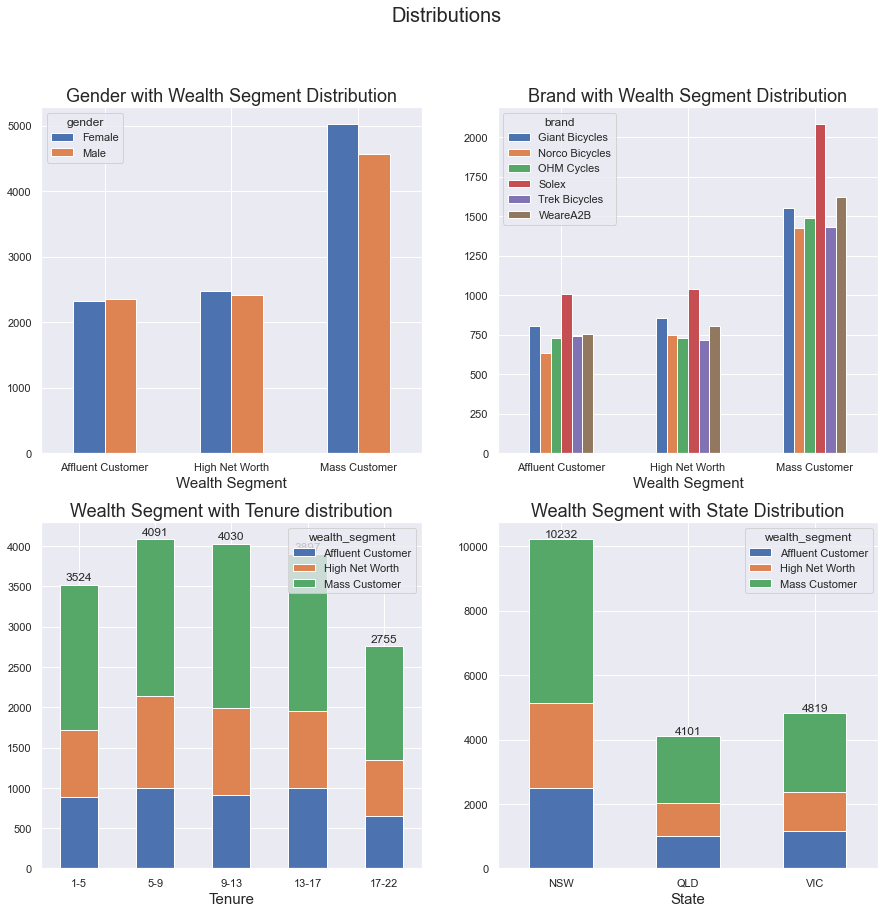

In [23]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 14))
plt.suptitle("Distributions", fontsize = 20)
# First subplot
countw= df_Approved.wealth_segment.value_counts().sort_index()
wealth_gen = df_Approved.groupby(['wealth_segment', 'gender'])['gender'].count().unstack()
wealth_gen.plot(kind = "bar", ax=axes[0, 0])
custom_labels = countw.index
axes[0, 0].set_xticks(range(len(custom_labels)))
axes[0, 0].set_title('Gender with Wealth Segment Distribution', fontsize=18)
axes[0, 0].set_xticklabels(custom_labels, rotation=360)
axes[0, 0].set_xlabel("Wealth Segment", fontsize=15)

# Second subplot
wealth_brand = df_Approved.groupby(['wealth_segment', 'brand'])['brand'].count().unstack()
wealth_brand.plot(kind = "bar", ax=axes[0, 1])
custom_labels = countw.index
axes[0, 1].set_xticks(range(len(custom_labels)))
axes[0, 1].set_title('Brand with Wealth Segment Distribution', fontsize=18)
axes[0, 1].set_xticklabels(custom_labels, rotation=360)
axes[0, 1].set_xlabel("Wealth Segment", fontsize=15)

# Third subplot
count = df_Approved.tenure_bin.value_counts().sort_index()
wealth_tenure = df_Approved.groupby(['tenure_bin', 'wealth_segment'])['wealth_segment'].count().unstack()
wealth_tenure.plot.bar(stacked=True, ax=axes[1, 0])
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.0f}".format(counts)
    axes[1, 0].text(loc, counts + 50, pct_str, ha="center")
custom_labels = count.index
axes[1, 0].set_xticks(range(len(custom_labels)))
axes[1, 0].set_title('Wealth Segment with Tenure distribution', fontsize = 18)
axes[1, 0].set_xticklabels(custom_labels, rotation=360)
axes[1, 0].set_xlabel("Tenure", fontsize = 15)

# Fourth subplot
count= df_Approved.state.value_counts().sort_index()
state_wealth = df_Approved.groupby(['state', 'wealth_segment'])['state'].count().unstack()
state_wealth.plot.bar(stacked=True, ax=axes[1, 1])
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.0f}".format(counts)
    axes[1, 1].text(loc, counts + 50, pct_str, ha="center")
custom_labels = count.index
axes[1, 1].set_xticks(range(len(custom_labels)))
axes[1, 1].set_title('Wealth Segment with State Distribution', fontsize=18)
axes[1, 1].set_xticklabels(custom_labels, rotation=360)
axes[1, 1].set_xlabel("State", fontsize=15)

plt.show()

Further analysis shows that female customers outnumber their male counterparts in every wealth segments, except for the affluent segment, where male customers hold a slight lead. This observation further solidifies our earlier conclusion that females make up a larger proportion of transactions compared to males.

Turning our attention to brand preferences, it becomes evident that Solex, WeareA2B, and Giant Bicycles are the top choices across all wealth segments. Notably, Solex commands the largest share, highlighting its broad appeal among customers across a diverse range of wealth categories.

Moreover, our initial findings regarding wealth segments gain more support from the data. Mass customers exhibit a substantial presence across all tenure categories, indicating their widespread representation and not being confined to a specific tenure group.

A closer look at the distribution of customers among wealth segment reveals a consistent trend: Mass customers consistently leads in terms of representation across all states. This reaffirms our initial assumptions about the significance of mass customers as a primary customer base.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


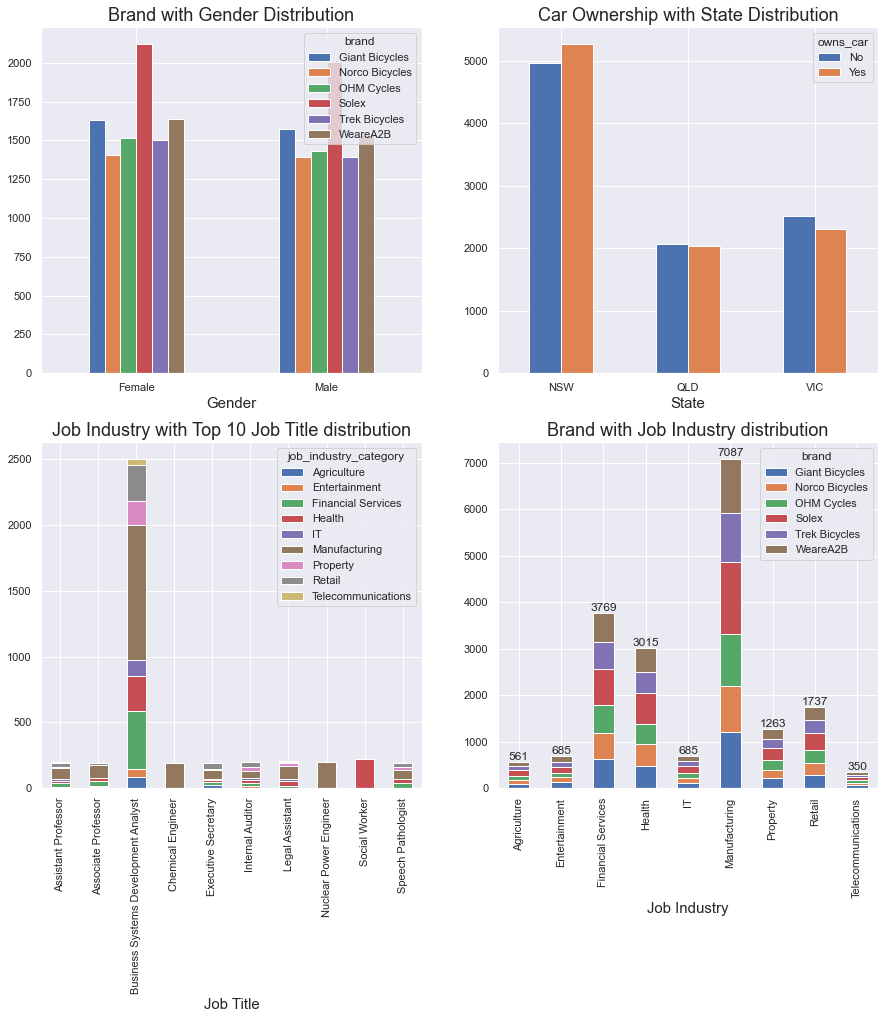

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 14))
# First subplot
count= df_Approved.gender.value_counts().sort_index()
gender_brand = df_Approved.groupby(['gender', 'brand'])['brand'].count().unstack()
gender_brand.plot(kind = "bar", ax=axes[0, 0])
custom_labels = count.index
axes[0, 0].set_xticks(range(len(custom_labels)))
axes[0, 0].set_title('Brand with Gender Distribution', fontsize=18)
axes[0, 0].set_xticklabels(custom_labels, rotation=360)
axes[0, 0].set_xlabel("Gender", fontsize=15)

# Second subplot
count= df_Approved.state.value_counts().sort_index()
state_car = df_Approved.groupby(['state', 'owns_car'])['brand'].count().unstack()
state_car.plot(kind = "bar", ax=axes[0, 1])
custom_labels = count.index
axes[0, 1].set_xticks(range(len(custom_labels)))
axes[0, 1].set_title('Car Ownership with State Distribution', fontsize=18)
axes[0, 1].set_xticklabels(custom_labels, rotation=360)
axes[0, 1].set_xlabel("State", fontsize=15)
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')

# Third subplot
toptitle = jobtitle10.index
filtered = df_Approved[df_Approved['job_title'].isin(toptitle)]
job_car = filtered.groupby(["job_title", "job_industry_category"]).size().unstack()
job_car.plot.bar(stacked=True, ax=axes[1, 0])
custom_labels = job_car.index
axes[1, 0].set_xticks(range(len(custom_labels)))
axes[1, 0].set_title('Job Industry with Top 10 Job Title distribution', fontsize = 18)
axes[1, 0].set_xticklabels(custom_labels)
axes[1, 0].set_xlabel("Job Title", fontsize = 15)
plt.legend()

# Fourth subplot
count = df_Approved["job_industry_category"].value_counts().sort_index()
job_brand = df_Approved.groupby(['job_industry_category', 'brand'])['wealth_segment'].count().unstack()
job_brand.plot.bar(stacked=True, ax=axes[1, 1])
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.0f}".format(counts)
    axes[1, 1].text(loc, counts + 50, pct_str, ha="center")
custom_labels = count.index
axes[1, 1].set_xticks(range(len(custom_labels)))
axes[1, 1].set_title('Brand with Job Industry distribution', fontsize=18)
axes[1, 1].set_xticklabels(custom_labels)
axes[1, 1].set_xlabel("Job Industry", fontsize = 15)
plt.show()

Upon further analysis, the breakdown of gender by brand presents an intriguing trend. Solex, WeareA2B, and Giant Bicycles consistently stand out as the top choices across genders. This finding lends additional credence to our initial conclusion that Solex, WeareA2B, and Giant Bicycles are highly sought-after products.

Moreover, our initial insights into car ownership receive further validation here. In New South Wales, customers who own cars exhibit a more substantial presence, while customers without cars dominate in Victoria and Queensland, albeit with a slight margin for Queensland. This extends our earlier assumption where customers that own car have a slightly increased proportion, as observed in our initial car ownership plotting.

When delving into the distribution of job industry across top 10 job title categories, we observe that Manufacturing sector possess the highest distribution across the job title catgories. This reaffirms our initial assumptions on job industries. Also, those whose job title are chemical engineer and nuclear power engineer are entirely comes from the manufacturing sector.

In the realm of brand preference, Solex, WeareA2B, and Giant Bicycles maintain their status as the preferred choices across all job industries, with Solex commanding the largest share. This further underscores the brand's wide-ranging appeal, spanning a diverse array of job industry categories.

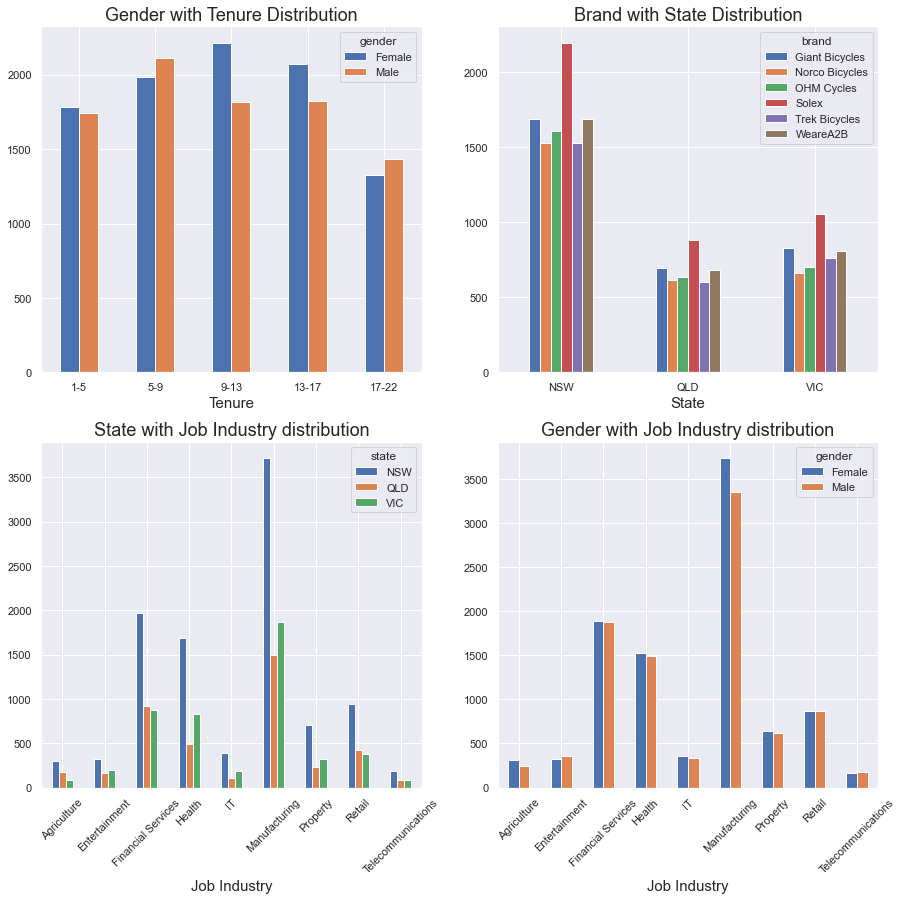

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 14))
# First subplot
count= df_Approved.tenure_bin.value_counts().sort_index()
ten_gender = df_Approved.groupby(['tenure_bin', 'gender'])['brand'].count().unstack()
ten_gender.plot(kind = "bar", ax=axes[0, 0])
custom_labels = count.index
axes[0, 0].set_xticks(range(len(custom_labels)))
axes[0, 0].set_title('Gender with Tenure Distribution', fontsize=18)
axes[0, 0].set_xticklabels(custom_labels, rotation=360)
axes[0, 0].set_xlabel("Tenure", fontsize=15)

# Second subplot
count= df_Approved.state.value_counts().sort_index()
state_brand = df_Approved.groupby(['state', 'brand'])['owns_car'].count().unstack()
state_brand.plot(kind = "bar", ax=axes[0, 1])
custom_labels = count.index
axes[0, 1].set_xticks(range(len(custom_labels)))
axes[0, 1].set_title('Brand with State Distribution', fontsize=18)
axes[0, 1].set_xticklabels(custom_labels, rotation=360)
axes[0, 1].set_xlabel("State", fontsize=15)

# Third subplot
count = df_Approved.job_industry_category.value_counts().sort_index()
job_state = df_Approved.groupby(['job_industry_category', 'state'])['wealth_segment'].count().unstack()
job_state.plot.bar(ax=axes[1, 0])
custom_labels = count.index
axes[1, 0].set_xticks(range(len(custom_labels)))
axes[1, 0].set_title('State with Job Industry distribution', fontsize = 18)
axes[1, 0].set_xticklabels(custom_labels, rotation=45)
axes[1, 0].set_xlabel("Job Industry", fontsize = 15)

# Fourth subplot
job_gender = df_Approved.groupby(['job_industry_category', 'gender'])['wealth_segment'].count().unstack()
job_gender.plot.bar(ax=axes[1, 1])
custom_labels = count.index
axes[1, 1].set_xticks(range(len(custom_labels)))
axes[1, 1].set_title('Gender with Job Industry distribution', fontsize=18)
axes[1, 1].set_xticklabels(custom_labels, rotation=45)
axes[1, 1].set_xlabel("Job Industry", fontsize = 15)
plt.show()

Total revenue for gender
Female    10812530.71
Male      10372513.14
Name: list_price, dtype: float64 

Total profit for gender
Female    5373015.39
Male      5172605.26
Name: profit, dtype: float64 

Total revenue for wealth_segment
Mass Customer        10608342.84
High Net Worth        5388623.16
Affluent Customer     5188077.85
Name: list_price, dtype: float64 

Total profit for wealth_segment
Mass Customer        5272229.87
High Net Worth       2678711.97
Affluent Customer    2594678.81
Name: profit, dtype: float64


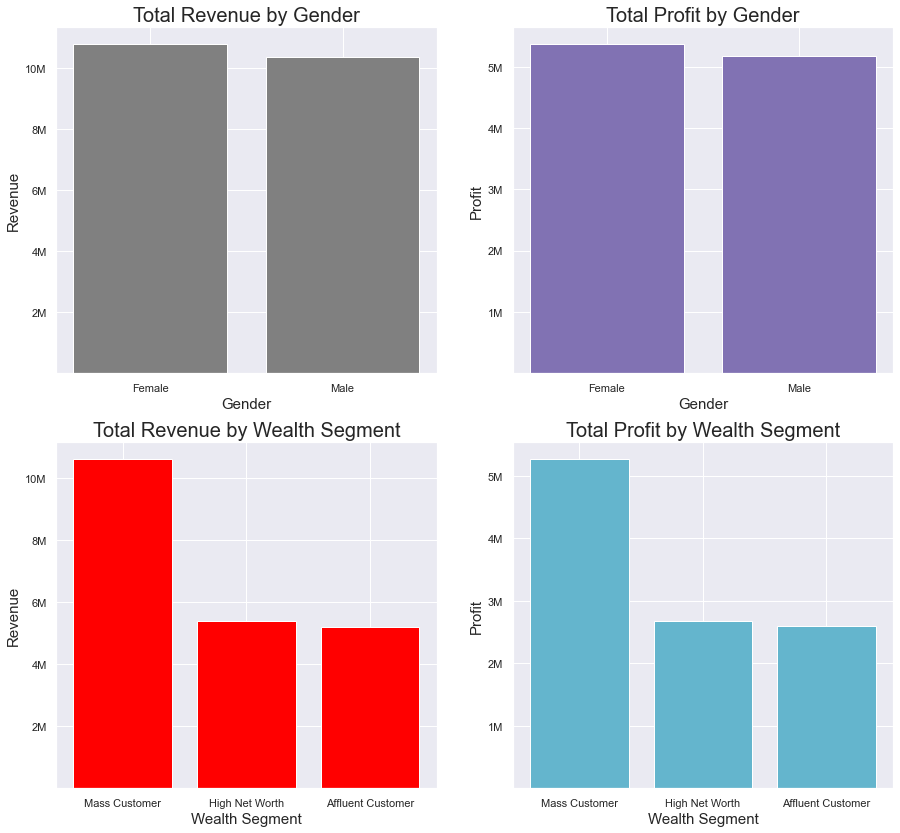

In [26]:
rcParams['figure.figsize'] = 15, 14
plt.subplot(2, 2, 1)
location = [1, 2]
label = ["Female", "Male"]
sum_values = df_Approved.groupby("gender")["list_price"].sum()
print("Total revenue for", sum_values, "\n")
tickpos = [2e6, 4e6, 6e6, 8e6, 10e6]
plt.bar(location, sum_values, tick_label = label, color = 'grey')
plt.title("Total Revenue by Gender", fontsize = 20)
custlabel = ["2M", "4M", "6M", "8M", "10M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)

plt.subplot(2, 2, 2)
sum_values = df_Approved.groupby("gender")["profit"].sum()
print("Total profit for", sum_values, "\n")
tickpos = [1e6, 2e6, 3e6, 4e6, 5e6]
plt.bar(location, sum_values, tick_label = label, color = 'm')
plt.title("Total Profit by Gender", fontsize = 20)
custlabel = ["1M", "2M", "3M", "4M", "5M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("Profit", fontsize = 15)

plt.subplot(2, 2, 3)
location = [1, 2, 3]
sum_values = df_Approved.groupby("wealth_segment")["list_price"].sum().sort_values(ascending = False)
label = sum_values.index
print("Total revenue for", sum_values, "\n")
plt.bar(location, sum_values, tick_label = label, color = 'red')
plt.title("Total Revenue by Wealth Segment", fontsize = 20)
tickpos = [2e6, 4e6, 6e6, 8e6, 10e6]
custlabel = ["2M", "4M", "6M", "8M", "10M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Wealth Segment", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)

plt.subplot(2, 2, 4)
sum_values = df_Approved.groupby("wealth_segment")["profit"].sum().sort_values(ascending = False)
label = sum_values.index
print("Total profit for", sum_values)
plt.bar(location, sum_values, tick_label = label, color = 'c')
plt.title("Total Profit by Wealth Segment", fontsize = 20)
tickpos = [1e6, 2e6, 3e6, 4e6, 5e6]
custlabel = ["1M", "2M", "3M", "4M", "5M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Wealth Segment", fontsize = 15)
plt.ylabel("Profit", fontsize = 15)

plt.show()

When examining the financial metrics related to gender, it becomes apparent that the female category has generated a higher revenue and profit compared to the male category. This signifies that, within the gender classification, females have contributed more to both revenue and profit figures.

Shifting our focus to wealth segments, the analysis reveals that the mass customer segment stands out as the top contributor to revenue and profit generation. It is followed by the high net worth and affluent customer segments in terms of their financial contributions. This highlights the substantial financial impact of mass customers within the wealth segment, followed by the high net worth and affluent customers, in descending order of financial significance.

Total revenue for age_bin
20s    3358448.30
30s    3555209.99
40s    7241987.14
50s    3843660.71
60s    3150901.57
70s      13972.18
80s       7859.61
90s      13004.35
Name: list_price, dtype: float64 

Total profit for age_bin
20s    1672187.13
30s    1777751.71
40s    3595360.52
50s    1923513.04
60s    1559499.57
70s       7119.40
80s       2977.11
90s       7212.17
Name: profit, dtype: float64 

Total revenue for tenure_bin
1-5      3873401.63
5-9      4546183.60
9-13     4539972.10
13-17    4235858.33
17-22    3036453.97
Name: list_price, dtype: float64 

Total profit for tenure_bin
1-5      1896613.70
5-9      2254206.02
9-13     2294421.51
13-17    2097115.81
17-22    1529946.16
Name: profit, dtype: float64


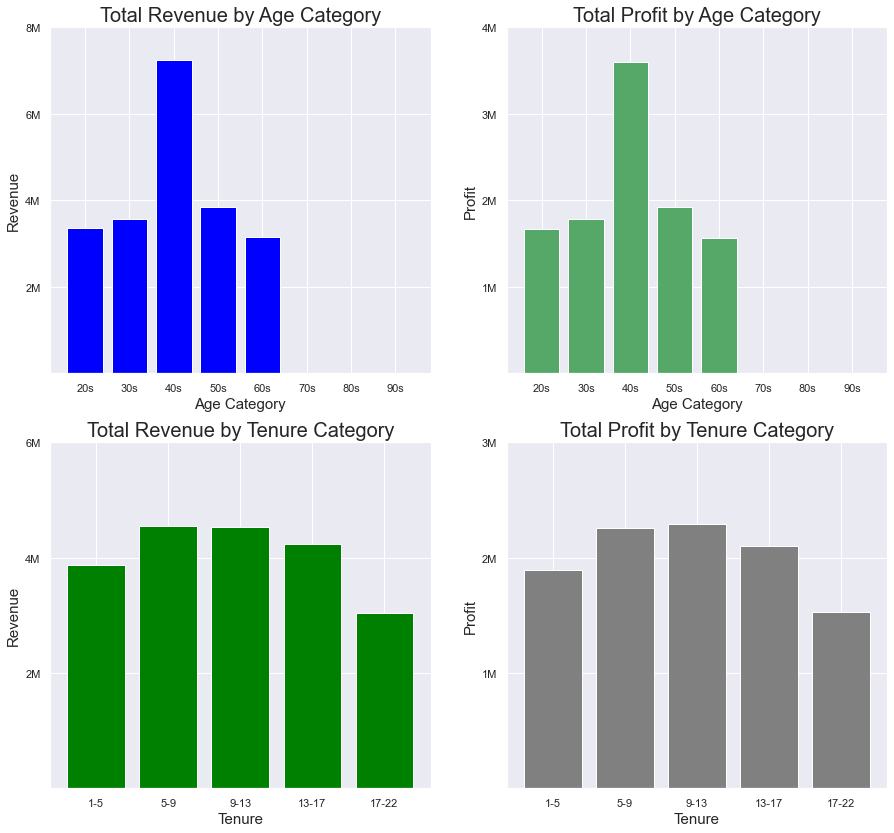

In [27]:
plt.subplot(2, 2, 1)
sum_values = df_Approved.groupby("age_bin")["list_price"].sum()
location = list(range(len(sum_values)))
label = sum_values.index
print("Total revenue for", sum_values, "\n")
plt.bar(location, sum_values, tick_label = label, color = 'blue')
plt.title("Total Revenue by Age Category", fontsize = 20)
tickpos = [2e6, 4e6, 6e6, 8e6]
custlabel = ["2M", "4M", "6M", "8M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Age Category", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)

plt.subplot(2, 2, 2)
sum_values = df_Approved.groupby("age_bin")["profit"].sum()
print("Total profit for", sum_values, "\n")
plt.bar(location, sum_values, tick_label = label, color = 'g')
plt.title("Total Profit by Age Category", fontsize = 20)
tickpos = [1e6, 2e6, 3e6, 4e6]
custlabel = ["1M", "2M", "3M", "4M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Age Category", fontsize = 15)
plt.ylabel("Profit", fontsize = 15)

plt.subplot(2, 2, 3)
sum_values = df_Approved.groupby("tenure_bin")["list_price"].sum()
location = list(range(len(sum_values)))
label = sum_values.index
print("Total revenue for", sum_values, "\n")
plt.bar(location, sum_values, tick_label = label, color = 'green')
plt.title("Total Revenue by Tenure Category", fontsize = 20)
tickpos = [2e6, 4e6, 6e6]
custlabel = ["2M", "4M", "6M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Tenure", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)

plt.subplot(2, 2, 4)
sum_values = df_Approved.groupby("tenure_bin")["profit"].sum()
print("Total profit for", sum_values)
plt.bar(location, sum_values, tick_label = label, color = 'grey')
plt.title("Total Profit by Tenure Category", fontsize = 20)
tickpos = [1e6, 2e6, 3e6]
custlabel = ["1M", "2M", "3M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Tenure", fontsize = 15)
plt.ylabel("Profit", fontsize = 15)

plt.show()

The revenue and profit patterns within the age and tenure categories align closely with the distribution count patterns observed in these categories.

When examining the revenue and profit generated by different age groups, a consistent pattern emerges. The age group in their 40s stands out as the top contributor to both revenue and profit, followed by the 50s and then the 30s. This indicates that customers in their 40s are not only the most numerous but also make a significant financial impact.

Similarly, when evaluating revenue and profit within tenure categories, a similar trend is observed. The highest levels of revenue and profit are concentrated in the tenure categories of 5-9 and 9-13. This suggests that customers who have been associated with the company for these tenure periods play a substantial role in the company's financial performance.

Total revenue for state
NSW    11264966.94
VIC     5349019.48
QLD     4571057.43
Name: list_price, dtype: float64 

Total profit for state
NSW    5598046.25
VIC    2679633.97
QLD    2267940.43
Name: profit, dtype: float64 

Total revenue for brand
Solex             4348628.72
WeareA2B          3999979.83
Giant Bicycles    3955992.30
Trek Bicycles     3428908.82
OHM Cycles        2896656.57
Norco Bicycles    2554877.61
Name: list_price, dtype: float64 

Total profit for brand
WeareA2B          2644808.24
Solex             2333056.08
Trek Bicycles     1782605.34
Giant Bicycles    1522809.07
OHM Cycles        1431994.93
Norco Bicycles     830346.99
Name: profit, dtype: float64


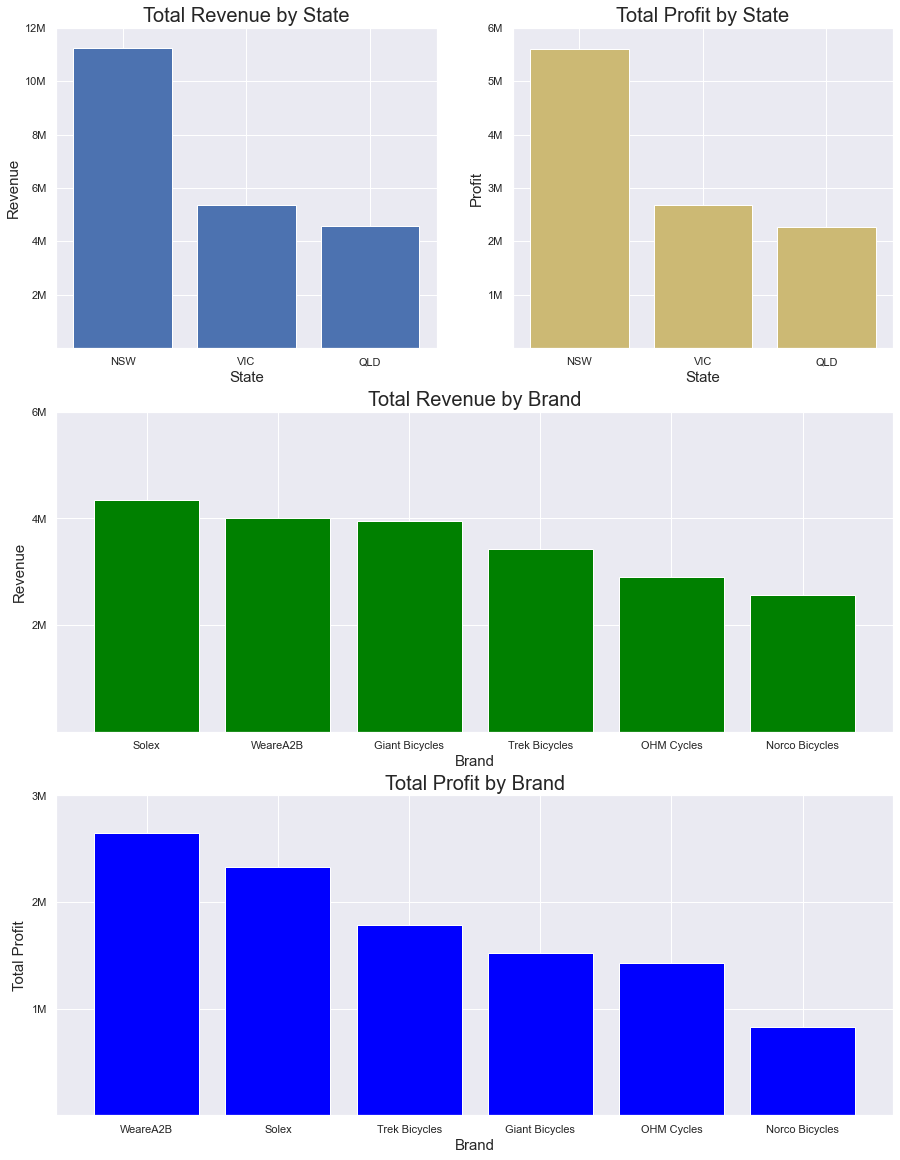

In [28]:
plt.figure(figsize = [15, 20])
plt.subplot(3, 2, 1)
sum_values = df_Approved.groupby("state")["list_price"].sum().sort_values(ascending = False)
location = list(range(len(sum_values)))
label = sum_values.index
print("Total revenue for", sum_values, "\n")
plt.bar(location, sum_values, tick_label = label, color = 'b')
plt.title("Total Revenue by State", fontsize = 20)
tickpos = [2e6, 4e6, 6e6, 8e6, 10e6, 12e6]
custlabel = ["2M", "4M", "6M", "8M", "10M", "12M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("State", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)

plt.subplot(3, 2, 2)
sum_values = df_Approved.groupby("state")["profit"].sum().sort_values(ascending = False)
location = list(range(len(sum_values)))
label = sum_values.index
print("Total profit for", sum_values, "\n")
plt.bar(location, sum_values, tick_label = label, color = 'y')
plt.title("Total Profit by State", fontsize = 20)
tickpos = [1e6, 2e6, 3e6, 4e6, 5e6, 6e6]
custlabel = ["1M", "2M", "3M", "4M", "5M", "6M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("State", fontsize = 15)
plt.ylabel("Profit", fontsize = 15)

plt.subplot(3, 1, 2)
sum_values = df_Approved.groupby("brand")["list_price"].sum().sort_values(ascending = False)
location = list(range(len(sum_values)))
label = sum_values.index
print("Total revenue for", sum_values, "\n")
plt.bar(location, sum_values, tick_label = label, color = 'green')
plt.title("Total Revenue by Brand", fontsize = 20)
tickpos = [2e6, 4e6, 6e6]
custlabel = ["2M", "4M", "6M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Brand", fontsize = 15)
plt.ylabel("Revenue", fontsize = 15)

plt.subplot(3, 1, 3)
sum_values = df_Approved.groupby("brand")["profit"].sum().sort_values(ascending = False)
location = list(range(len(sum_values)))
label = sum_values.index
print("Total profit for", sum_values)
plt.bar(location, sum_values, tick_label = label, color = 'blue')
plt.title("Total Profit by Brand", fontsize = 20)
tickpos = [1e6, 2e6, 3e6]
custlabel = ["1M", "2M", "3M"]
plt.yticks(tickpos, custlabel)
plt.xlabel("Brand", fontsize = 15)
plt.ylabel("Total Profit", fontsize = 15)

plt.show()

The revenue and profit trends within the state category closely mirror the distribution count patterns observed in these categories. The highest revenue and profit figures are centered around customers residing in New South Wales, followed by Victoria and Queensland, in a consistent order. This suggests that New South Wales is not only the most populous state in terms of customer distribution but also contributes the most significantly to the company's revenue and profit.

In contrast, when we analyze the revenue and profit generated by different brands, a different pattern emerges. Solex emerges as the brand with the highest revenue, followed by WeareA2B, Giant Bicycles, Trek Bicycles, OHM Cycles, and Norco Bicycles, in that order. However, the profit distribution by brand tells a different story, with WeareA2B generating the highest profit, followed by Solex, Trek Bicycles, Giant Bicycles, OHM Cycles, and Norco Bicycles, in that order. This discrepancy may be attributed to variations in pricing strategies among these brands, impacting both revenue and profit figures differently.

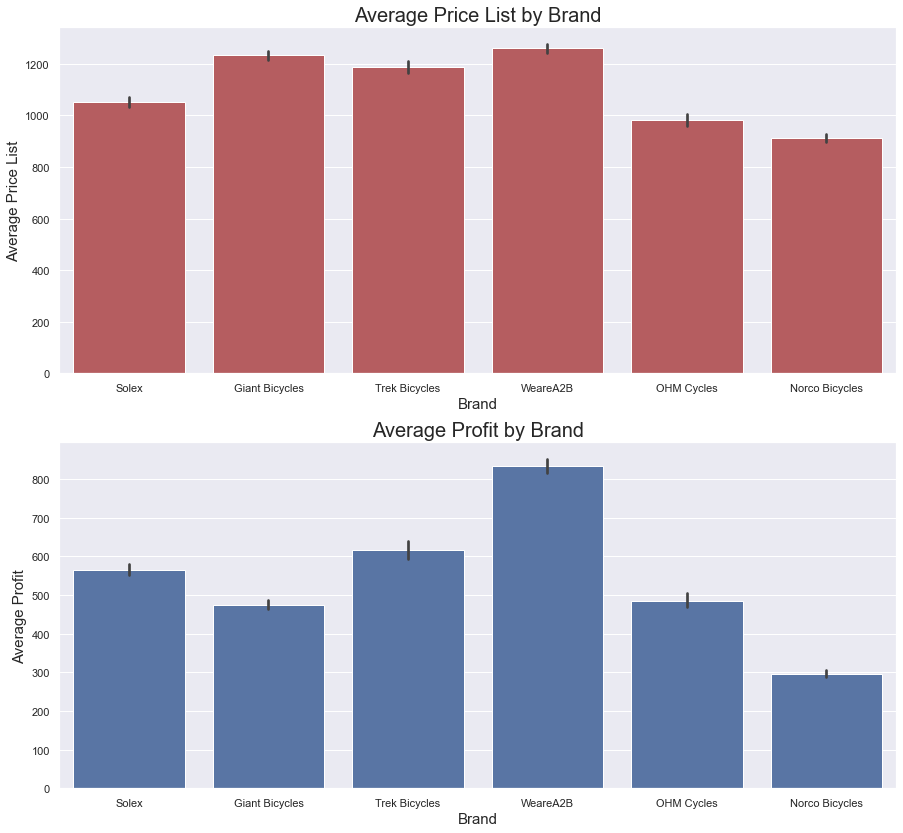

In [29]:
plt.subplot(2, 1, 1)
sns.barplot(data = df_Approved, x = "brand", y = "list_price", color = "r")
plt.title("Average Price List by Brand", fontsize = 20)
plt.xlabel("Brand", fontsize = 15)
plt.ylabel("Average Price List", fontsize = 15)

plt.subplot(2, 1, 2)
sns.barplot(data = df_Approved, x = "brand", y = "profit", color = "b")
plt.title("Average Profit by Brand", fontsize = 20)
plt.xlabel("Brand", fontsize = 15)
plt.ylabel("Average Profit", fontsize = 15)
plt.show()

To gain a deeper understanding of the variation in revenue and profit among the brands we analyzed earlier, we conducted a closer examination. It became apparent that the WeareA2B brand commands the highest prices, followed by Giant Bicycles, Trek Bicycles, Solex, OHM Cycles, and Norco Bicycles, in that sequence.

However, when we assessed the mean profit generated by each brand, a distinct pattern emerged. WeareA2B led the pack by a significant margin, followed by Trek Bicycles, Solex, OHM Cycles, Giant Bicycles, and Norco Bicycles, in that order. This discrepancy between pricing and mean profit indicates that factors beyond pricing, such as cost structure, sales volume, or product categories, are also influencing the profitability of these brands

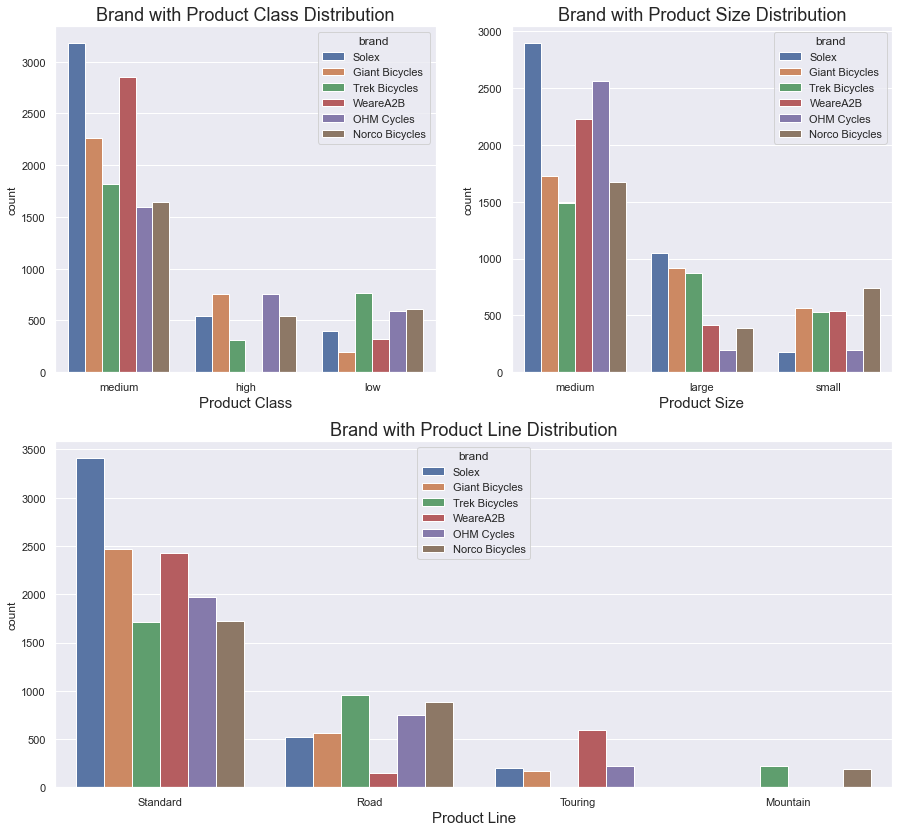

In [30]:
plt.subplot(2, 2, 1)
sns.countplot(data = df_Approved, x = "product_class", hue = "brand")
plt.title('Brand with Product Class Distribution', fontsize=18)
plt.xlabel("Product Class", fontsize = 15)

plt.subplot(2, 2, 2)
sns.countplot(data = df_Approved, x = "product_size", hue = "brand")
plt.title('Brand with Product Size Distribution', fontsize=18)
plt.xlabel("Product Size", fontsize = 15)

plt.subplot(2, 1, 2)
sns.countplot(data = df_Approved, x = "product_line", hue = "brand")
plt.title('Brand with Product Line Distribution', fontsize=18)
plt.xlabel("Product Line", fontsize = 15)

plt.show()

Regarding the product class, it's noteworthy that the medium class emerges as the category with the highest sales across all brands. Solex stands out as the top performer within this medium class category. However, when we shift our focus to the high-class segment, we observe that WeareA2B is absent, and the sales leadership is claimed by Giant Bicycles and OHM Cycles. In contrast, the low-class category sees Trek Bicycles as the leader.

Turning our attention to product size, we find that each brand offers products across all size categories. Among these, the medium-sized products consistently garner the highest sales distribution for all brands. Large-sized products follow, with small-sized products trailing behind in terms of sales. Solex leads in both the medium and large size categories, while Norcos takes the lead in the small size category.

In the realm of product lines, standard bicycles emerge as the most preferred choice among customers, with Solex, Giant Bicycles, and WeareA2B leading the pack in sales. Notably, there is a limited presence of WeareA2B in the Road product line. However, in the Touring product line, WeareA2B takes the lead. The Mountain product line presents an interesting scenario with the absence of most brands, except for Trek Bicycles and Norco Bicycles, which suggests a specific market focus within this category.

In [31]:
df_Approved.groupby(["product_class", "brand"]).mean()["list_price"].unstack()

brand          Giant Bicycles  Norco Bicycles   OHM Cycles        Solex  \
product_class                                                             
high              1382.404987     1189.000055   907.602712  1211.265110   
low                590.260000      666.203436  1056.209647  1096.378055   
medium            1237.573848      911.591178   990.027647  1020.625509   

brand          Trek Bicycles     WeareA2B  
product_class                              
high              436.801000          NaN  
low              1043.829186   892.809722  
medium           1374.093878  1302.460330

In [32]:
df_Approved.groupby(["product_size", "brand"]).mean()["list_price"].unstack()

brand         Giant Bicycles  Norco Bicycles   OHM Cycles        Solex  \
product_size                                                             
large            1541.669282     1022.866786    12.010000  1415.222612   
medium           1051.715654      833.972177   992.661452   881.985605   
small            1286.690873     1027.756901  1810.000000  1703.520000   

brand         Trek Bicycles     WeareA2B  
product_size                              
large           1897.557211  1646.579781  
medium           611.431300  1270.157776  
small           1623.718453   925.120019

In [33]:
df_Approved.groupby(["product_line", "brand"]).mean()["list_price"].unstack()

brand         Giant Bicycles  Norco Bicycles   OHM Cycles        Solex  \
product_line                                                             
Mountain                 NaN      688.630000          NaN          NaN   
Road              953.129309      815.244695   961.424761  1319.836879   
Standard         1252.720784      985.884698   979.895799   953.148901   
Touring          1873.970000             NaN  1073.070000  2083.940000   

brand         Trek Bicycles     WeareA2B  
product_line                              
Mountain         574.640000          NaN  
Road            1096.222288  1172.780000  
Standard        1313.745981  1185.474102  
Touring                 NaN  1591.576639

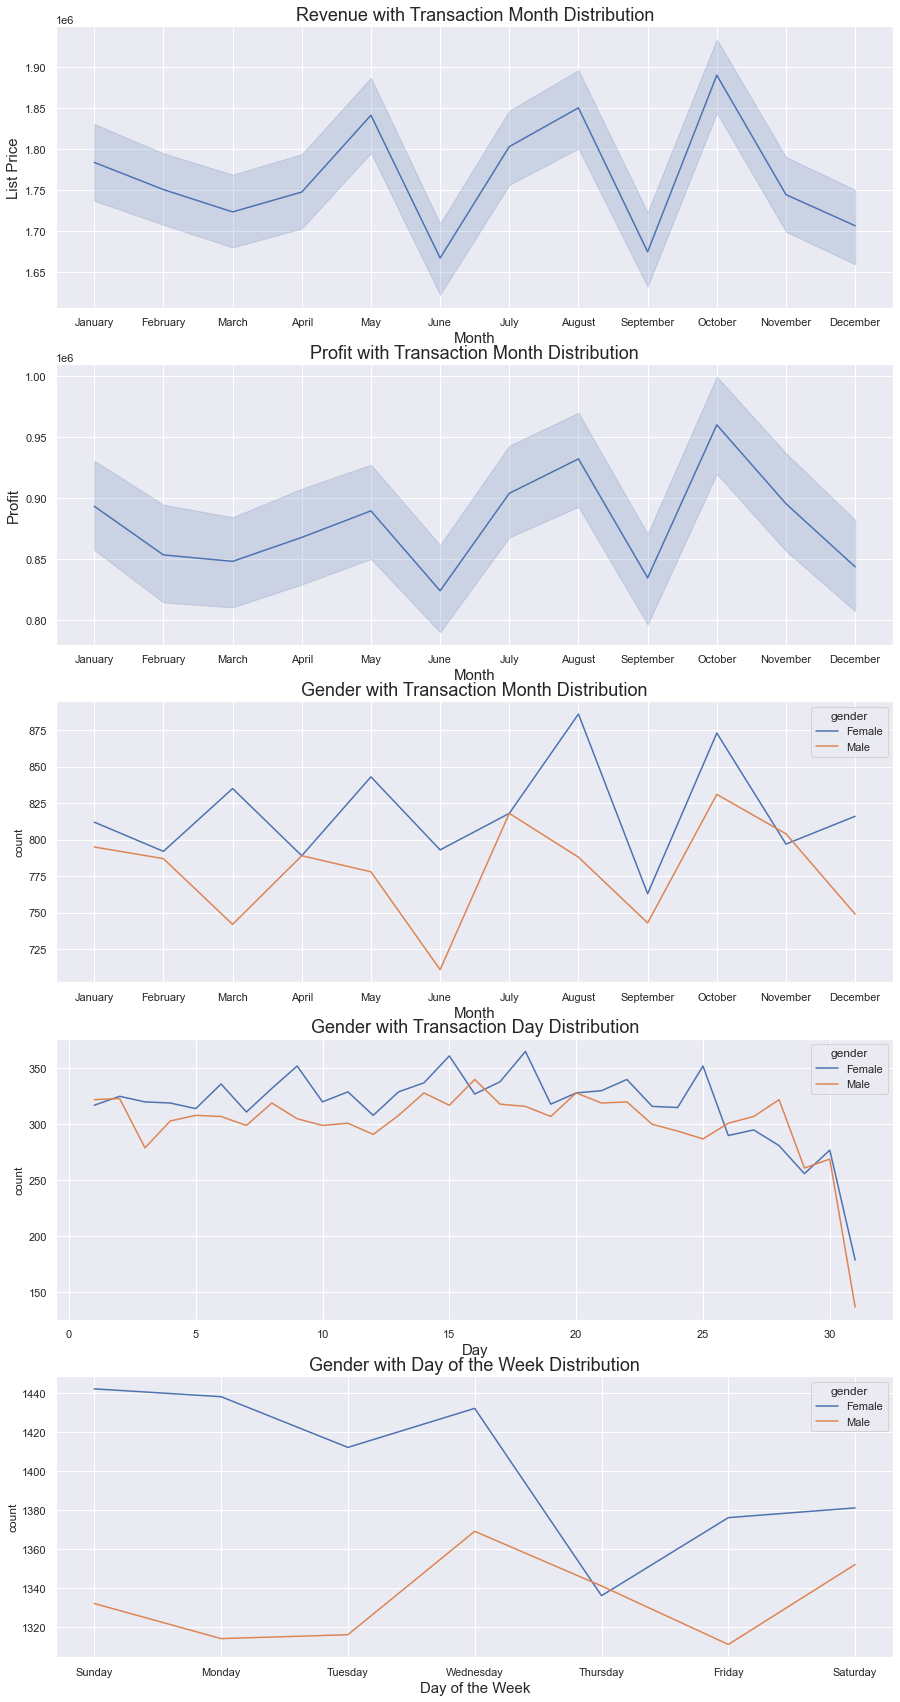

In [34]:
plt.figure(figsize = [15, 30])
plt.subplot(5, 1, 1)
sns.lineplot(x = "transaction_month", y = "list_price", estimator = "sum", data = df_Approved)
plt.title('Revenue with Transaction Month Distribution', fontsize=18)
plt.ylabel("List Price", fontsize = 15)
plt.xlabel("Month", fontsize = 15)

plt.subplot(5, 1, 2)
sns.lineplot(x = "transaction_month", y = "profit", estimator = "sum", data = df_Approved)
plt.title('Profit with Transaction Month Distribution', fontsize=18)
plt.ylabel("Profit", fontsize = 15)
plt.xlabel("Month", fontsize = 15)

plt.subplot(5, 1, 3)
summ = df_Approved.groupby(["transaction_month", "gender"])['brand'].count().reset_index(name = "count")
sns.lineplot(x = "transaction_month", y = "count", hue = "gender", estimator = "sum", data = summ)
plt.title('Gender with Transaction Month Distribution', fontsize=18)
plt.xlabel("Month", fontsize = 15)
           
plt.subplot(5, 1, 4)
summ = df_Approved.groupby(["transaction_day", "gender"])['brand'].count().reset_index(name = "count")
sns.lineplot(x = "transaction_day", y = "count", hue = "gender", estimator = "sum", data = summ)
plt.title('Gender with Transaction Day Distribution', fontsize=18)
plt.xlabel("Day", fontsize = 15)

plt.subplot(5, 1, 5)
summ = df_Approved.groupby(["day_of_the_week", "gender"])['brand'].count().reset_index(name = "count")
sns.lineplot(x = "day_of_the_week", y = "count", hue = "gender", estimator = "sum", data = summ)
plt.title('Gender with Day of the Week Distribution', fontsize=18)
plt.xlabel("Day of the Week", fontsize = 15)

plt.show()

Overall month/revenue distribution shows an increase in revenue in October, August, May, July, and January. Interestingly, our earlier analysis of the number of sales revealed that August significantly outperforms May in terms of sales volume. However, when we shift our focus to the revenue plot, we observe that the difference in revenue between these two months is relatively small. This intriguing contrast prompts us to delve deeper into the data to uncover the underlying reasons behind this discrepancy in revenue generation between August and May.

However, the profit distribution shows that the profit generated in August far outweight that of May.

Within the female category, the months of August, October, May, and March exhibit the highest sales figures, ranked in descending order. In contrast, for the male category, the months of October and July dominate in terms of sales, with October claiming the top spot as the month with the highest sales.

When we examine the trend in sales across transaction days, we notice a consistent pattern for both genders, with sales occurring regularly throughout the month, except for a significant drop in sales towards the end of the month.

For female gender, the days that consistently record the highest sales are Wednesdays, Mondays, Fridays and weekends, unlike the males that records Wednesdays, and weekends. These specific days appear to be particularly lucrative for sales activities, suggesting potential opportunities for targeted marketing and promotions to capitalize on these peak sales periods.

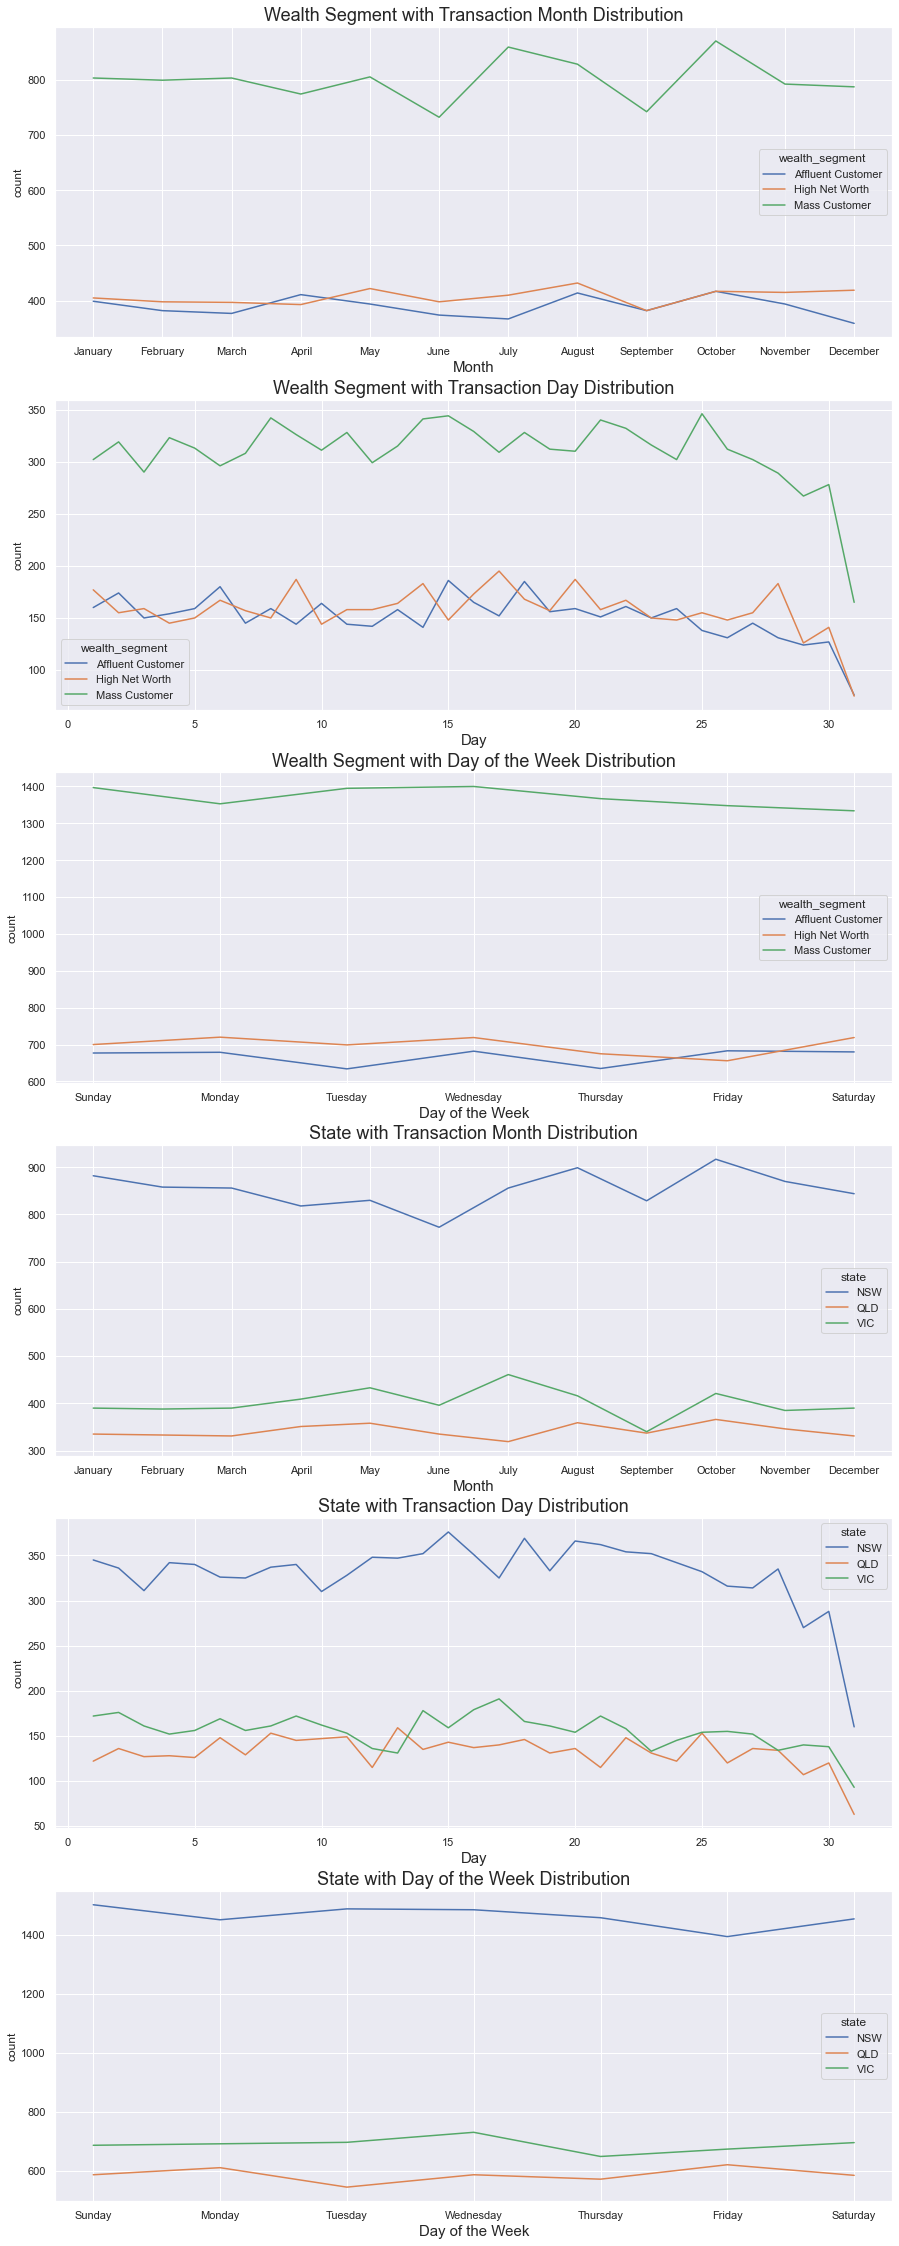

In [35]:
plt.figure(figsize = [15, 40])
plt.subplot(6, 1, 1)
summ = df_Approved.groupby(["transaction_month", "wealth_segment"])['brand'].count().reset_index(name = "count")
sns.lineplot(x = "transaction_month", y = "count", hue = "wealth_segment", estimator = "sum", data = summ)
plt.title('Wealth Segment with Transaction Month Distribution', fontsize=18)
plt.xlabel("Month", fontsize = 15)

plt.subplot(6, 1, 2)
summ = df_Approved.groupby(["transaction_day", "wealth_segment"])['brand'].count().reset_index(name = "count")
sns.lineplot(x = "transaction_day", y = "count", hue = "wealth_segment", estimator = "sum", data = summ)
plt.title('Wealth Segment with Transaction Day Distribution', fontsize=18)
plt.xlabel("Day", fontsize = 15)

plt.subplot(6, 1, 3)
summ = df_Approved.groupby(["day_of_the_week", "wealth_segment"])['brand'].count().reset_index(name = "count")
sns.lineplot(x = "day_of_the_week", y = "count", hue = "wealth_segment", estimator = "sum", data = summ)
plt.title('Wealth Segment with Day of the Week Distribution', fontsize=18)
plt.xlabel("Day of the Week", fontsize = 15)

plt.subplot(6, 1, 4)
summ = df_Approved.groupby(["transaction_month", "state"])['brand'].count().reset_index(name = "count")
sns.lineplot(x = "transaction_month", y = "count", hue = "state", estimator = "sum", data = summ)
plt.title('State with Transaction Month Distribution', fontsize=18)
plt.xlabel("Month", fontsize = 15)
           
plt.subplot(6, 1, 5)
summ = df_Approved.groupby(["transaction_day", "state"])['brand'].count().reset_index(name = "count")
sns.lineplot(x = "transaction_day", y = "count", hue = "state", estimator = "sum", data = summ)
plt.title('State with Transaction Day Distribution', fontsize=18)
plt.xlabel("Day", fontsize = 15)

plt.subplot(6, 1, 6)
summ = df_Approved.groupby(["day_of_the_week", "state"])['brand'].count().reset_index(name = "count")
sns.lineplot(x = "day_of_the_week", y = "count", hue = "state", estimator = "sum", data = summ)
plt.title('State with Day of the Week Distribution', fontsize=18)
plt.xlabel("Day of the Week", fontsize = 15)
plt.show()

In both the wealth segment and state categories, the months of August, October, May, July, and March emerge as the months with the highest recorded sales figures. These months consistently demonstrate robust sales performance across both wealth segments and states.

Upon closer examination of sales trends across transaction days, a common pattern emerges within both wealth segments and states. Sales follow a consistent pattern throughout the month, maintaining a steady pace, but there is a noticeable and substantial drop in sales as the month draws to a close.

Additionally, when we analyze the plot among days of the week for both state and wealth segment categories, there aren't significant differences in the sales patterns. This suggests that, regardless of the day of the week, the sales distribution remains relatively consistent across these two categories. 

# MULTIVARIATE PLOTTING

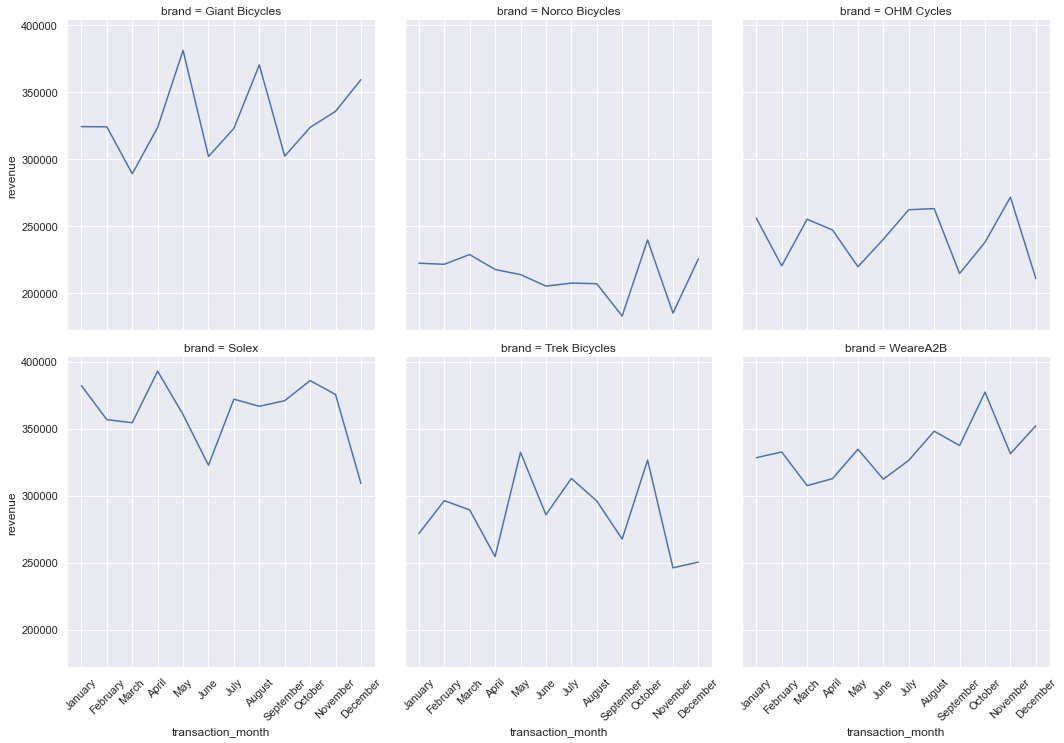

In [36]:
summ = df_Approved.groupby(["transaction_month", "brand"])['list_price'].sum().reset_index(name = "revenue")
g = sns.FacetGrid(data = summ, col = "brand", col_wrap = 3, height = 5)
g.map(sns.lineplot, "transaction_month", "revenue", estimator = "sum")
g.set_xticklabels(rotation = 45)
plt.show()

We observed that Giant Bicycles and Trek Bicycles, which have higher pricing points, experience higher sales in May compared to other months.

In [37]:
# Save dataset to csv file
path = "C:/Users/USER/Documents/Udacity/Sprocket/RFM Analysis/Customer_Approved.csv"
df_Approved.to_csv(path, index = False)